In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df=pd.read_csv('cricket_data_cln.csv')
df

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.0,2,lost,vNew Zealand,Vadodara,17 Feb 1996,Netherlands,7,26.857143,3.760000,62.666667,42.857143
1,230,50.0,4.60,280.0,2,lost,vEngland,Peshawar,22 Feb 1996,Netherlands,6,38.333333,4.600000,76.666667,50.000000
2,145,50.0,2.90,NaN,1,lost,vPakistan,Lahore,26 Feb 1996,Netherlands,7,20.714286,2.900000,48.333333,42.857143
3,216,50.0,4.32,NaN,1,lost,vU.A.E.,Lahore,1 Mar 1996,Netherlands,9,24.000000,4.320000,72.000000,33.333333
4,168,50.0,3.36,329.0,2,lost,vSouth Africa,Rawalpindi,5 Mar 1996,Netherlands,8,21.000000,3.360000,56.000000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9179,121,11.0,11.00,118.0,2,won,vIndia,Visakhapatnam,19 Mar 2023,Australia,0,inf,11.000000,183.333333,inf
9180,269,49.0,5.48,NaN,1,won,vIndia,Chennai,22 Mar 2023,Australia,10,26.900000,5.489796,91.496599,29.400000
9181,225,40.2,5.57,223.0,2,won,vSouth Africa,Bloemfontein,7 Sep 2023,Australia,7,32.142857,5.597015,93.283582,34.457143
9182,392,50.0,7.84,NaN,1,won,vSouth Africa,Bloemfontein,9 Sep 2023,Australia,8,49.000000,7.840000,130.666667,37.500000


In [ ]:
df.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.0,2,lost,vNew Zealand,Vadodara,17 Feb 1996,Netherlands,7,26.857143,3.76,62.666667,42.857143
1,230,50.0,4.60,280.0,2,lost,vEngland,Peshawar,22 Feb 1996,Netherlands,6,38.333333,4.60,76.666667,50.000000
2,145,50.0,2.90,NaN,1,lost,vPakistan,Lahore,26 Feb 1996,Netherlands,7,20.714286,2.90,48.333333,42.857143
3,216,50.0,4.32,NaN,1,lost,vU.A.E.,Lahore,1 Mar 1996,Netherlands,9,24.000000,4.32,72.000000,33.333333
4,168,50.0,3.36,329.0,2,lost,vSouth Africa,Rawalpindi,5 Mar 1996,Netherlands,8,21.000000,3.36,56.000000,37.500000


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Target                       4638
Overs                          35
Bowling_EconomyRate            35
Strike_Rate                    35
Bowling_Strike_Rate            35
Score                           0
RPO                             0
Inns                            0
Result                          0
Opposition                      0
Ground                          0
Start Date                      0
Team name                       0
Wicket                          0
Batting_Average_Main_Team       0
dtype: int64

In [ ]:
df.shape

(9184, 15)

In [ ]:
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

Score: 0.0%
Overs: 0.38%
RPO: 0.0%
Target: 50.5%
Inns: 0.0%
Result: 0.0%
Opposition: 0.0%
Ground: 0.0%
Start Date: 0.0%
Team name: 0.0%
Wicket: 0.0%
Batting_Average_Main_Team: 0.0%
Bowling_EconomyRate: 0.38%
Strike_Rate: 0.38%
Bowling_Strike_Rate: 0.38%


In [ ]:
df.dtypes

Score                          int64
Overs                        float64
RPO                          float64
Target                       float64
Inns                           int64
Result                        object
Opposition                    object
Ground                        object
Start Date                    object
Team name                     object
Wicket                         int64
Batting_Average_Main_Team    float64
Bowling_EconomyRate          float64
Strike_Rate                  float64
Bowling_Strike_Rate          float64
dtype: object

In [ ]:
inf_count = np.isinf(df['Batting_Average_Main_Team']).sum()

print("Number of 'inf' values in 'Batting_Average_Main_Team':", inf_count)

Number of 'inf' values in 'Batting_Average_Main_Team': 85


In [ ]:
inf_count = np.isinf(df['Bowling_EconomyRate']).sum()

print("Number of 'inf' values in 'Bowling_EconomyRate':", inf_count)

Number of 'inf' values in 'Bowling_EconomyRate': 0


In [ ]:
inf_count = np.isinf(df['Strike_Rate']).sum()

print("Number of 'inf' values in 'Strike_Rate':", inf_count)

Number of 'inf' values in 'Strike_Rate': 0


In [ ]:
inf_count = np.isinf(df['Bowling_Strike_Rate']).sum()

print("Number of 'inf' values in 'Bowling_Strike_Rate':", inf_count)

Number of 'inf' values in 'Bowling_Strike_Rate': 84


In [ ]:
is_inf1 = np.isinf(df['Batting_Average_Main_Team'])
is_inf2 = np.isinf(df['Bowling_Strike_Rate'])

combined_condition = is_inf1 | is_inf2

combined_condition_drop = df.index[combined_condition]


df2 = df.drop(combined_condition_drop, axis=0)


In [ ]:
inf_count = np.isinf(df2['Batting_Average_Main_Team']).sum()

print("Number of 'inf' values in 'Batting_Average_Main_Team':", inf_count)

Number of 'inf' values in 'Batting_Average_Main_Team': 0


In [ ]:
inf_count = np.isinf(df2['Bowling_Strike_Rate']).sum()

print("Number of 'inf' values in 'Bowling_Strike_Rate':", inf_count)

Number of 'inf' values in 'Bowling_Strike_Rate': 0


In [ ]:
null_rows = df2[df2['Overs'].isnull()]
mean = df2['Overs'].mean()
df2['Overs'].fillna(mean, inplace=True)

In [ ]:
null_rows = df2[df2['Bowling_EconomyRate'].isnull()]
mean = df2['Bowling_EconomyRate'].mean()
df2['Bowling_EconomyRate'].fillna(mean, inplace=True)

In [ ]:
null_rows = df2[df2['Bowling_Strike_Rate'].isnull()]
mean = df2['Bowling_Strike_Rate'].mean()
df2['Bowling_Strike_Rate'].fillna(mean, inplace=True)

In [ ]:
null_rows = df2[df2['Strike_Rate'].isnull()]
mean = df2['Strike_Rate'].mean()
df2['Strike_Rate'].fillna(mean, inplace=True)

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2['Start Date'] = pd.to_datetime(df2['Start Date'])

In [ ]:
df2.corr()

<ipython-input-21-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Score,Overs,RPO,Target,Inns,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
Score,1.000000,0.664530,0.718053,0.609267,-0.256262,-0.098666,0.343294,0.707881,0.707881,0.183610
Overs,0.664530,1.000000,-0.002601,0.494634,-0.337154,0.258993,-0.028937,-0.012162,-0.012162,-0.007154
RPO,0.718053,-0.002601,1.000000,0.214820,-0.029647,-0.378006,0.498275,0.996724,0.996724,0.261184
Target,0.609267,0.494634,0.214820,1.000000,NaN,0.478595,-0.152958,0.205785,0.205785,-0.235798
Inns,-0.256262,-0.337154,-0.029647,NaN,1.000000,-0.174994,0.112918,-0.022877,-0.022877,0.147966
Wicket,-0.098666,0.258993,-0.378006,0.478595,-0.174994,1.000000,-0.770881,-0.381699,-0.381699,-0.777144
Batting_Average_Main_Team,0.343294,-0.028937,0.498275,-0.152958,0.112918,-0.770881,1.000000,0.498830,0.498830,0.945203
Bowling_EconomyRate,0.707881,-0.012162,0.996724,0.205785,-0.022877,-0.381699,0.498830,1.000000,1.000000,0.262664
Strike_Rate,0.707881,-0.012162,0.996724,0.205785,-0.022877,-0.381699,0.498830,1.000000,1.000000,0.262664
Bowling_Strike_Rate,0.183610,-0.007154,0.261184,-0.235798,0.147966,-0.777144,0.945203,0.262664,0.262664,1.000000


<ipython-input-22-358905a85071>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),cmap='Blues',linecolor='white',linewidth=2,annot=True)


<Axes: >

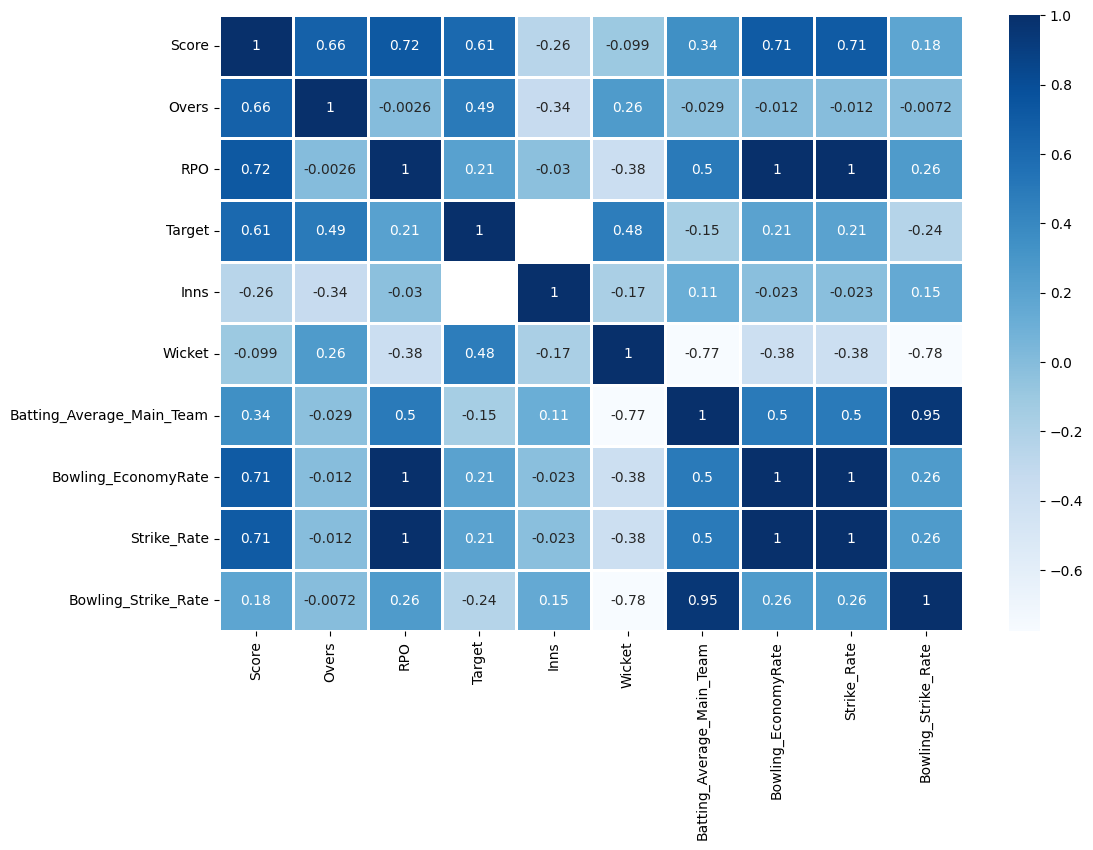

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(),cmap='Blues',linecolor='white',linewidth=2,annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


if df2['Target'].isnull().any():

    df_missing = df2[df2['Target'].isnull()]
    df_not_missing = df2[~df2['Target'].isnull()]
    X = df_not_missing[['Score', 'Wicket', 'Overs']]
    y = df_not_missing['Target']
    model = LinearRegression()
    model.fit(X, y)
    X_missing = df_missing[['Score', 'Wicket', 'Overs']]
    predicted_target_values = model.predict(X_missing)
    df2.loc[df2['Target'].isnull(), 'Target'] = predicted_target_values
else:
    print("No missing 'Target' values found in the DataFrame.")


In [ ]:
df2.isnull().sum().sort_values(ascending=False)

Score                        0
Overs                        0
RPO                          0
Target                       0
Inns                         0
Result                       0
Opposition                   0
Ground                       0
Start Date                   0
Team name                    0
Wicket                       0
Batting_Average_Main_Team    0
Bowling_EconomyRate          0
Strike_Rate                  0
Bowling_Strike_Rate          0
dtype: int64

In [ ]:
df2.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.000000,2,lost,vNew Zealand,Vadodara,1996-02-17,Netherlands,7,26.857143,3.76,62.666667,42.857143
1,230,50.0,4.60,280.000000,2,lost,vEngland,Peshawar,1996-02-22,Netherlands,6,38.333333,4.60,76.666667,50.000000
2,145,50.0,2.90,185.852854,1,lost,vPakistan,Lahore,1996-02-26,Netherlands,7,20.714286,2.90,48.333333,42.857143
3,216,50.0,4.32,258.454982,1,lost,vU.A.E.,Lahore,1996-03-01,Netherlands,9,24.000000,4.32,72.000000,33.333333
4,168,50.0,3.36,329.000000,2,lost,vSouth Africa,Rawalpindi,1996-03-05,Netherlands,8,21.000000,3.36,56.000000,37.500000


In [ ]:
df2.dtypes

Score                                 int64
Overs                               float64
RPO                                 float64
Target                              float64
Inns                                  int64
Result                               object
Opposition                           object
Ground                               object
Start Date                   datetime64[ns]
Team name                            object
Wicket                                int64
Batting_Average_Main_Team           float64
Bowling_EconomyRate                 float64
Strike_Rate                         float64
Bowling_Strike_Rate                 float64
dtype: object

In [ ]:
df2.Ground.unique()

array(['Vadodara', 'Peshawar', 'Lahore', 'Rawalpindi', 'Colombo (RPS)',
       'Colombo (SSC)', 'Paarl', 'East London', 'Potchefstroom',
       'Bulawayo', 'Bloemfontein', 'Amstelveen', 'Ayr', 'Benoni',
       'Nairobi (Ruaraka)', 'Nairobi (Gym)', 'Nairobi (Jaff)',
       'Basseterre', 'Toronto', 'Dublin', 'Belfast', 'Rotterdam',
       'The Hague', 'Glasgow', 'Nagpur', 'Delhi', 'Mohali', 'Chattogram',
       'Eden Gardens', 'Aberdeen', 'Sharjah', 'King City (NW)', 'Lincoln',
       'Mount Maunganui', 'Deventer', 'Utrecht', 'Doha', 'Hamilton',
       'Harare', 'Johannesburg', 'Windhoek', 'Al Amerat', 'Kirtipur',
       'ICCA Dubai', 'Dubai (DSC)', 'Pearland', 'Mulpani', 'Christchurch',
       'Nottingham', 'Birmingham', 'Leeds', 'Sialkot', 'Albion',
       'Sahiwal', 'Manchester', 'The Oval', 'Quetta', 'Karachi',
       'Melbourne', 'Adelaide', 'Sydney', 'Perth', 'Brisbane',
       'Hyderabad (Sind)', 'Gujranwala', 'Multan', 'Swansea', "Lord's",
       'Hyderabad (Deccan)', 'Jaipur', '

In [ ]:
df2.isnull().sum().sort_values(ascending=False)

Score                        0
Overs                        0
RPO                          0
Target                       0
Inns                         0
Result                       0
Opposition                   0
Ground                       0
Start Date                   0
Team name                    0
Wicket                       0
Batting_Average_Main_Team    0
Bowling_EconomyRate          0
Strike_Rate                  0
Bowling_Strike_Rate          0
dtype: int64

In [ ]:
df2.shape

(9099, 15)

In [ ]:
for column in df2.columns:
    percentage = df2[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

Score: 0.0%
Overs: 0.0%
RPO: 0.0%
Target: 0.0%
Inns: 0.0%
Result: 0.0%
Opposition: 0.0%
Ground: 0.0%
Start Date: 0.0%
Team name: 0.0%
Wicket: 0.0%
Batting_Average_Main_Team: 0.0%
Bowling_EconomyRate: 0.0%
Strike_Rate: 0.0%
Bowling_Strike_Rate: 0.0%


In [ ]:
df2.dtypes

Score                                 int64
Overs                               float64
RPO                                 float64
Target                              float64
Inns                                  int64
Result                               object
Opposition                           object
Ground                               object
Start Date                   datetime64[ns]
Team name                            object
Wicket                                int64
Batting_Average_Main_Team           float64
Bowling_EconomyRate                 float64
Strike_Rate                         float64
Bowling_Strike_Rate                 float64
dtype: object

In [ ]:
unique_value_counts = df2.nunique()
print(unique_value_counts)

Score                         392
Overs                         303
RPO                           620
Target                       3200
Inns                            2
Result                          4
Opposition                     29
Ground                        188
Start Date                   3927
Team name                      29
Wicket                         10
Batting_Average_Main_Team    1587
Bowling_EconomyRate          4678
Strike_Rate                  4720
Bowling_Strike_Rate          1051
dtype: int64


In [ ]:
df2.describe()

,Score,Overs,RPO,Target,Inns,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
count,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000
mean,218.057918,44.653767,4.871022,249.608616,1.491263,7.418727,37.382020,4.889795,81.496579,44.196987
std,62.835054,8.258003,1.093510,53.332338,0.499951,2.658033,28.928646,1.091523,18.192043,28.951680
min,6.000000,2.400000,1.110000,36.000000,1.000000,1.000000,1.700000,1.116625,18.610422,3.060000
25%,177.000000,42.200000,4.130000,219.950120,1.000000,5.000000,20.700000,4.152110,69.201839,28.860000
50%,219.000000,48.300000,4.810000,253.597226,1.000000,8.000000,28.900000,4.834711,80.578512,36.000000
75%,259.000000,50.000000,5.550000,283.261240,2.000000,10.000000,43.928571,5.560000,92.666667,50.000000
max,498.000000,60.000000,13.470000,499.000000,2.000000,10.000000,399.000000,13.513514,225.225225,307.800000


Text(0.5, 1.0, 'Histogram Plot For Score')

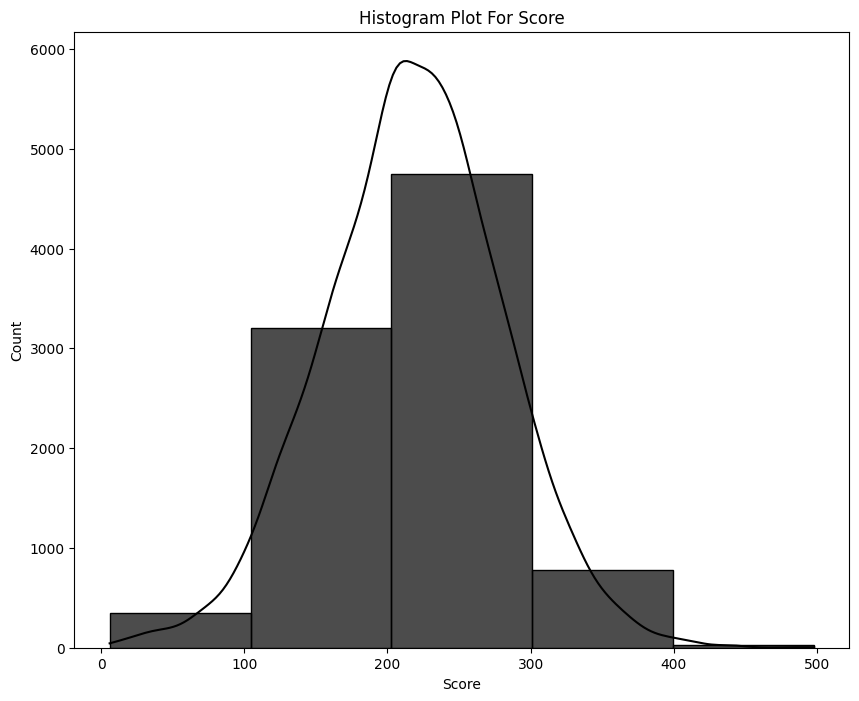

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df2,x="Score",bins=5,color='black',kde='True',alpha=0.7)
plt.title('Histogram Plot For Score')

Text(0.5, 1.0, 'Histogram Plot For Overs')

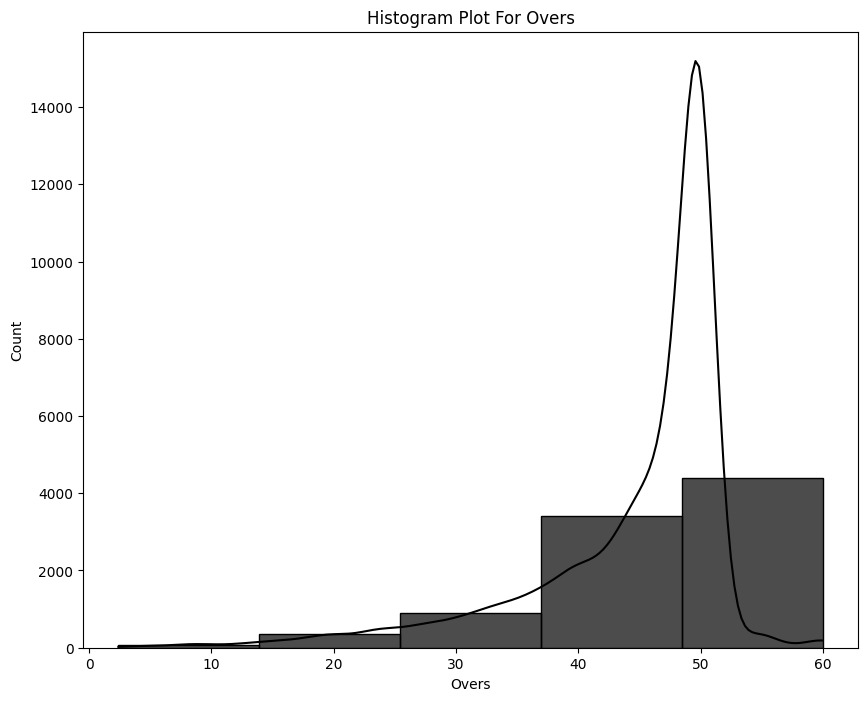

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df2,x="Overs",bins=5,color='black',kde='True',alpha=0.7)
plt.title('Histogram Plot For Overs')

Text(0.5, 1.0, 'Histogram Plot For Wicket')

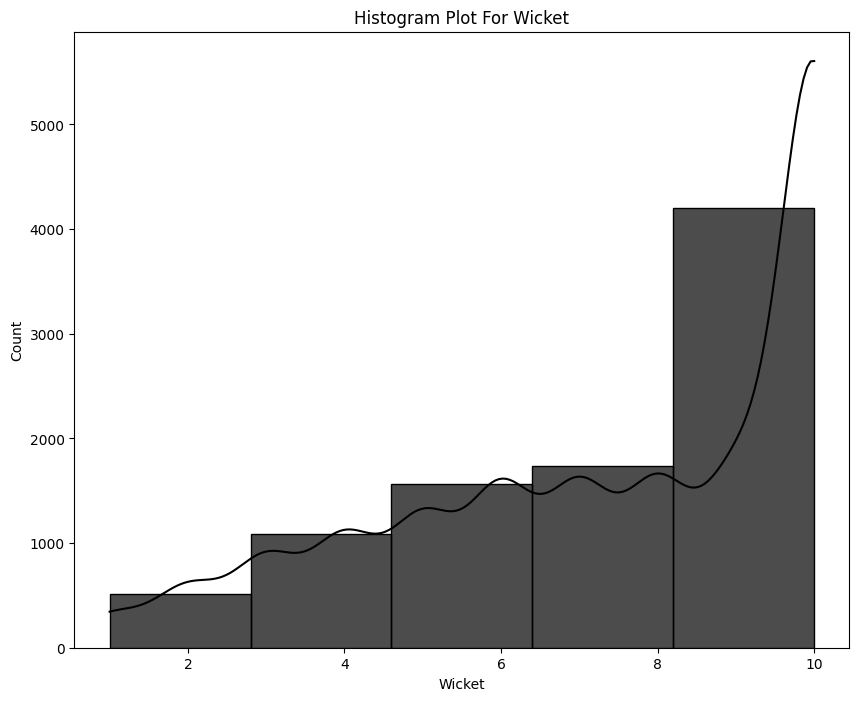

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df2,x="Wicket",bins=5,color='black',kde='True',alpha=0.7)
plt.title('Histogram Plot For Wicket')

Text(0.5, 1.0, 'Top 10 Team name Distribution')

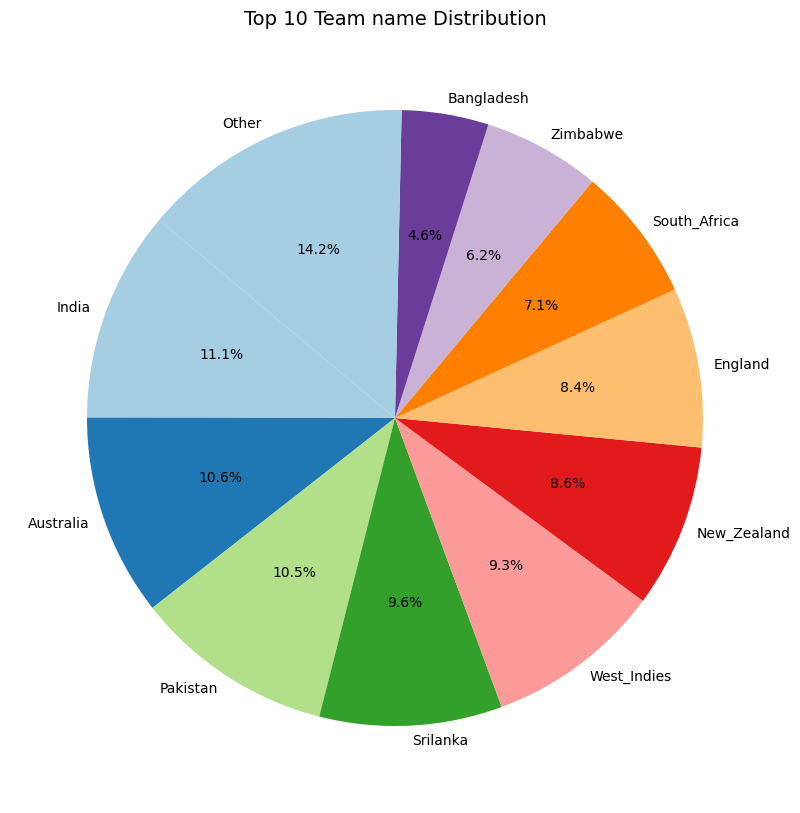

In [ ]:
top_n = 10
opposition_counts = df2['Team name'].value_counts()
top_opposition = opposition_counts.head(top_n)
other_count = opposition_counts.iloc[top_n:].sum()
colors = plt.cm.Paired(range(top_n))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(12, 10))
plt.pie([*top_opposition, other_count], labels=[*top_opposition.index, 'Other'], autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, labeldistance=1.05)
plt.title('Top 10 Team name Distribution', fontsize=14)

Text(0.5, 1.0, 'Top 10 Opposition Distribution')

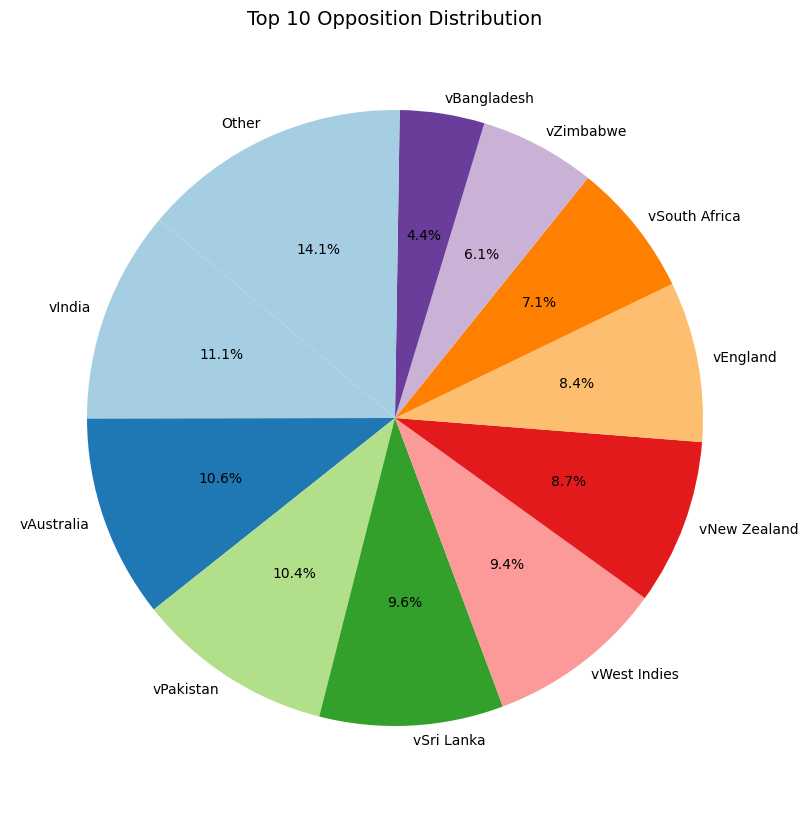

In [ ]:
top_n = 10
opposition_counts = df2['Opposition'].value_counts()
top_opposition = opposition_counts.head(top_n)
other_count = opposition_counts.iloc[top_n:].sum()
colors = plt.cm.Paired(range(top_n))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(12, 10))
plt.pie([*top_opposition, other_count], labels=[*top_opposition.index, 'Other'], autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, labeldistance=1.05)
plt.title('Top 10 Opposition Distribution', fontsize=14)

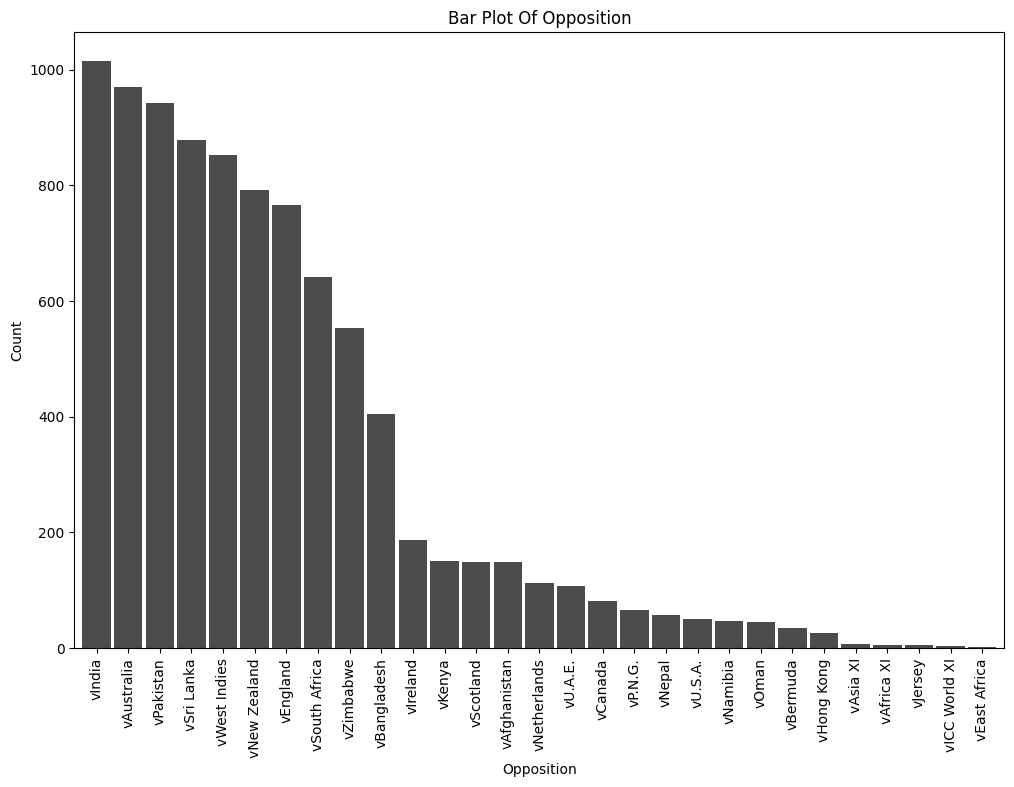

In [ ]:
plt.figure(figsize=(12, 8))
opposition_counts = df2['Opposition'].value_counts()
bar_width = 0.9
opposition_counts.plot(kind='bar', color='black', alpha=0.7, width=bar_width)
plt.title('Bar Plot Of Opposition')
plt.xlabel('Opposition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


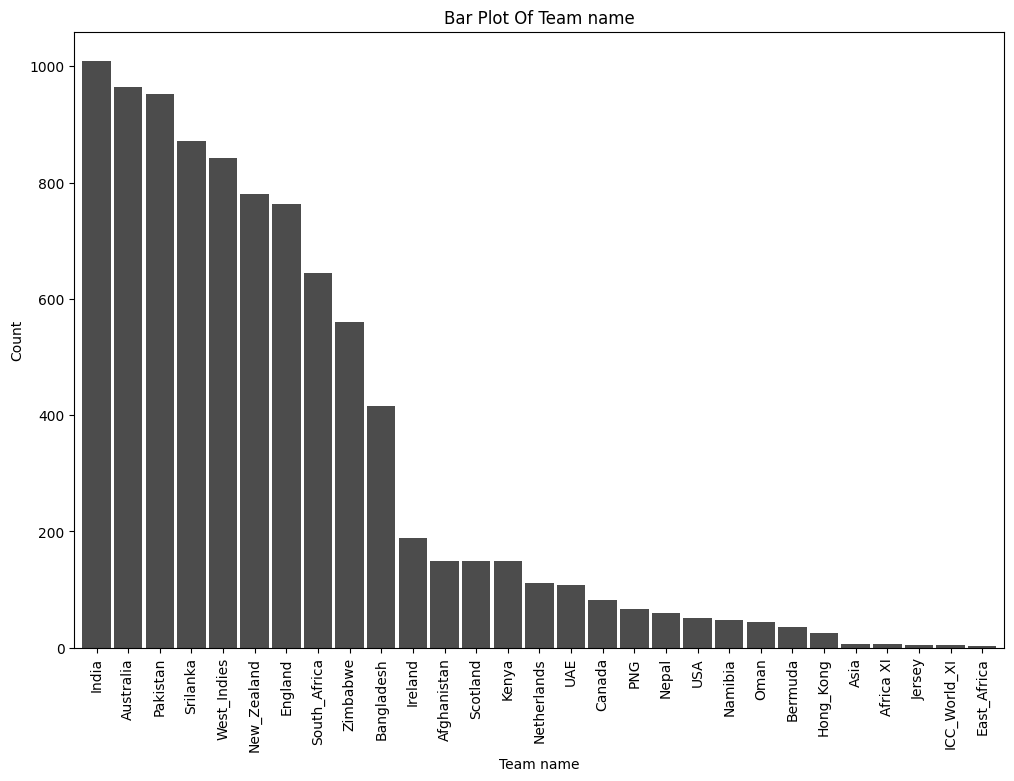

In [ ]:
plt.figure(figsize=(12, 8))
opposition_counts = df2['Team name'].value_counts()
bar_width = 0.9
opposition_counts.plot(kind='bar', color='black', alpha=0.7, width=bar_width)
plt.title('Bar Plot Of Team name')
plt.xlabel('Team name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


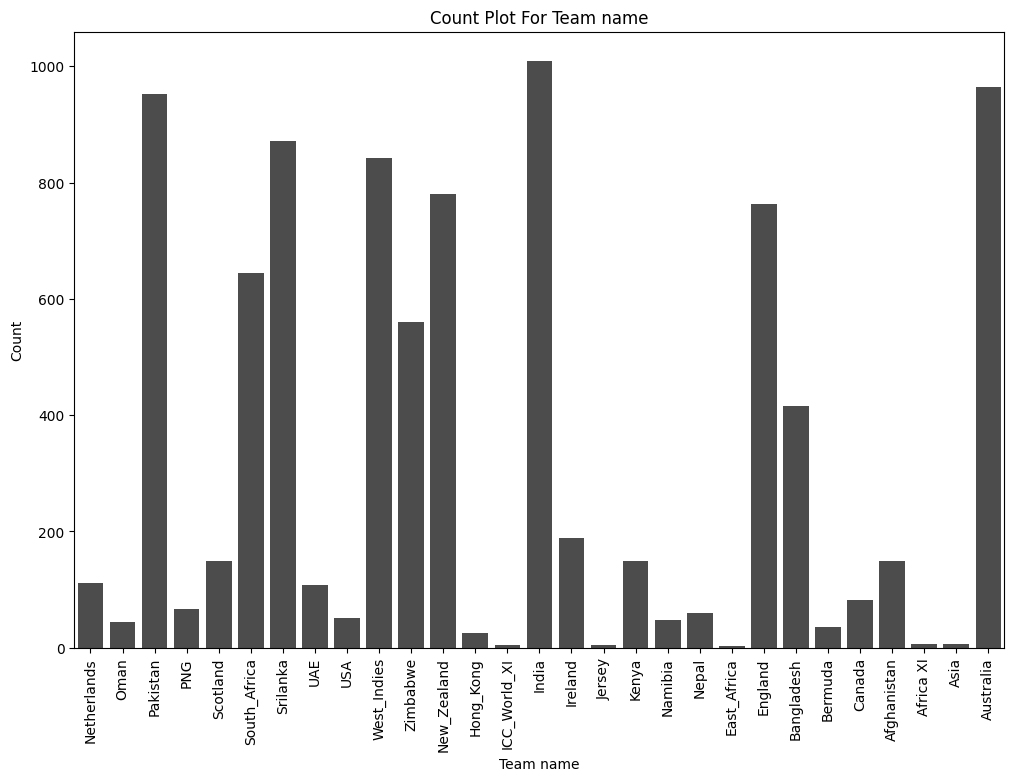

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='Team name', color='black', alpha=0.7, linewidth=2)
plt.title('Count Plot For Team name')
plt.xlabel('Team name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

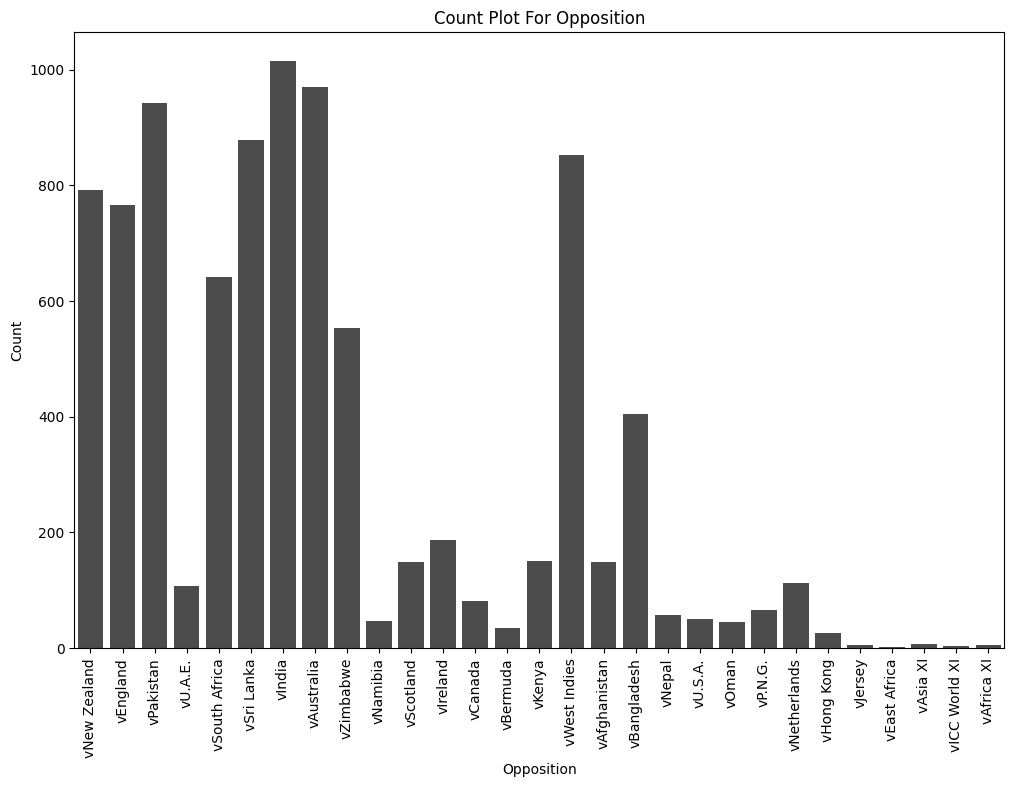

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='Opposition', color='black', alpha=0.7, linewidth=2)
plt.title('Count Plot For Opposition')
plt.xlabel('Opposition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Netherlands'),
  Text(1, 0, 'Oman'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'PNG'),
  Text(4, 0, 'Scotland'),
  Text(5, 0, 'South_Africa'),
  Text(6, 0, 'Srilanka'),
  Text(7, 0, 'UAE'),
  Text(8, 0, 'USA'),
  Text(9, 0, 'West_Indies'),
  Text(10, 0, 'Zimbabwe'),
  Text(11, 0, 'New_Zealand'),
  Text(12, 0, 'Hong_Kong'),
  Text(13, 0, 'ICC_World_XI'),
  Text(14, 0, 'India'),
  Text(15, 0, 'Ireland'),
  Text(16, 0, 'Jersey'),
  Text(17, 0, 'Kenya'),
  Text(18, 0, 'Namibia'),
  Text(19, 0, 'Nepal'),
  Text(20, 0, 'East_Africa'),
  Text(21, 0, 'England'),
  Text(22, 0, 'Bangladesh'),
  Text(23, 0, 'Bermuda'),
  Text(24, 0, 'Canada'),
  Text(25, 0, 'Afghanistan'),
  Text(26, 0, 'Africa XI'),
  Text(27, 0, 'Asia'),
  Text(28, 0, 'Australia')])

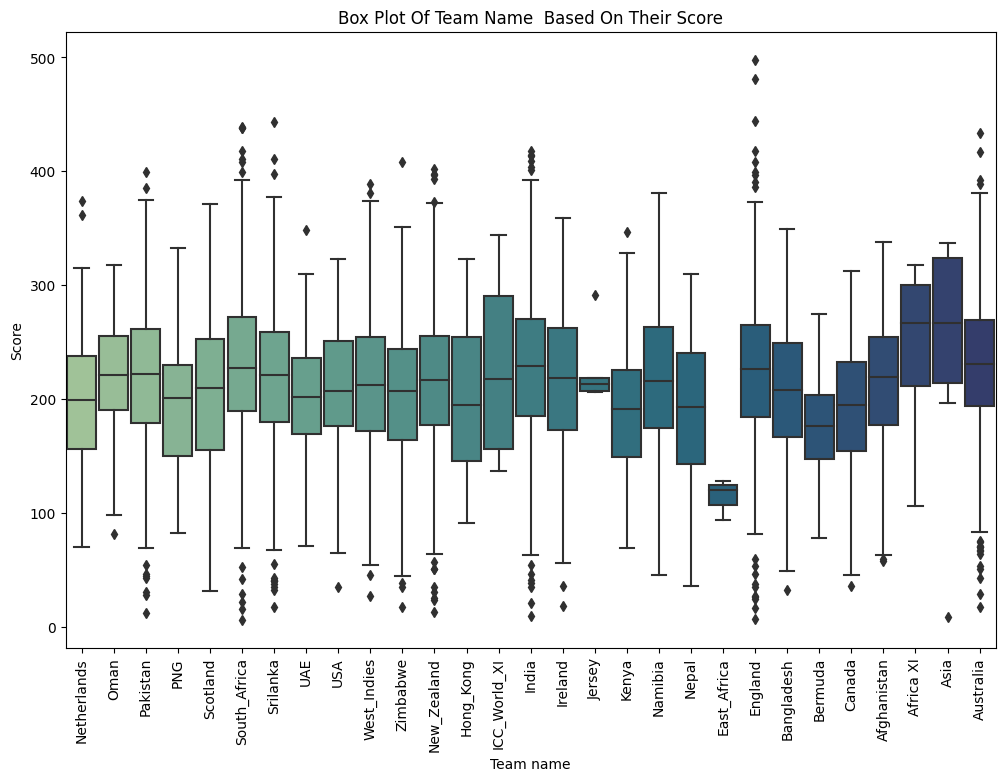

In [ ]:
plt.figure(figsize=(12, 8))
bar_width = 0.9
sns.boxplot(data=df2, x='Team name', y = 'Score',palette='crest',linewidth=1.5,width=bar_width)
plt.title('Box Plot Of Team Name  Based On Their Score')
plt.xticks(rotation=90)

In [ ]:
df2

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.000000,2,lost,vNew Zealand,Vadodara,1996-02-17,Netherlands,7,26.857143,3.760000,62.666667,42.857143
1,230,50.0,4.60,280.000000,2,lost,vEngland,Peshawar,1996-02-22,Netherlands,6,38.333333,4.600000,76.666667,50.000000
2,145,50.0,2.90,185.852854,1,lost,vPakistan,Lahore,1996-02-26,Netherlands,7,20.714286,2.900000,48.333333,42.857143
3,216,50.0,4.32,258.454982,1,lost,vU.A.E.,Lahore,1996-03-01,Netherlands,9,24.000000,4.320000,72.000000,33.333333
4,168,50.0,3.36,329.000000,2,lost,vSouth Africa,Rawalpindi,1996-03-05,Netherlands,8,21.000000,3.360000,56.000000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,188,35.4,5.27,262.409867,1,lost,vIndia,Wankhede,2023-03-17,Australia,10,18.800000,5.310734,88.512241,21.240000
9180,269,49.0,5.48,308.744014,1,won,vIndia,Chennai,2023-03-22,Australia,10,26.900000,5.489796,91.496599,29.400000
9181,225,40.2,5.57,223.000000,2,won,vSouth Africa,Bloemfontein,2023-09-07,Australia,7,32.142857,5.597015,93.283582,34.457143
9182,392,50.0,7.84,379.002393,1,won,vSouth Africa,Bloemfontein,2023-09-09,Australia,8,49.000000,7.840000,130.666667,37.500000


In [ ]:
df2['Opposition'] = df2['Opposition'].str.replace('v', '', regex=True)


In [ ]:
df2

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.000000,2,lost,New Zealand,Vadodara,1996-02-17,Netherlands,7,26.857143,3.760000,62.666667,42.857143
1,230,50.0,4.60,280.000000,2,lost,England,Peshawar,1996-02-22,Netherlands,6,38.333333,4.600000,76.666667,50.000000
2,145,50.0,2.90,185.852854,1,lost,Pakistan,Lahore,1996-02-26,Netherlands,7,20.714286,2.900000,48.333333,42.857143
3,216,50.0,4.32,258.454982,1,lost,U.A.E.,Lahore,1996-03-01,Netherlands,9,24.000000,4.320000,72.000000,33.333333
4,168,50.0,3.36,329.000000,2,lost,South Africa,Rawalpindi,1996-03-05,Netherlands,8,21.000000,3.360000,56.000000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,188,35.4,5.27,262.409867,1,lost,India,Wankhede,2023-03-17,Australia,10,18.800000,5.310734,88.512241,21.240000
9180,269,49.0,5.48,308.744014,1,won,India,Chennai,2023-03-22,Australia,10,26.900000,5.489796,91.496599,29.400000
9181,225,40.2,5.57,223.000000,2,won,South Africa,Bloemfontein,2023-09-07,Australia,7,32.142857,5.597015,93.283582,34.457143
9182,392,50.0,7.84,379.002393,1,won,South Africa,Bloemfontein,2023-09-09,Australia,8,49.000000,7.840000,130.666667,37.500000


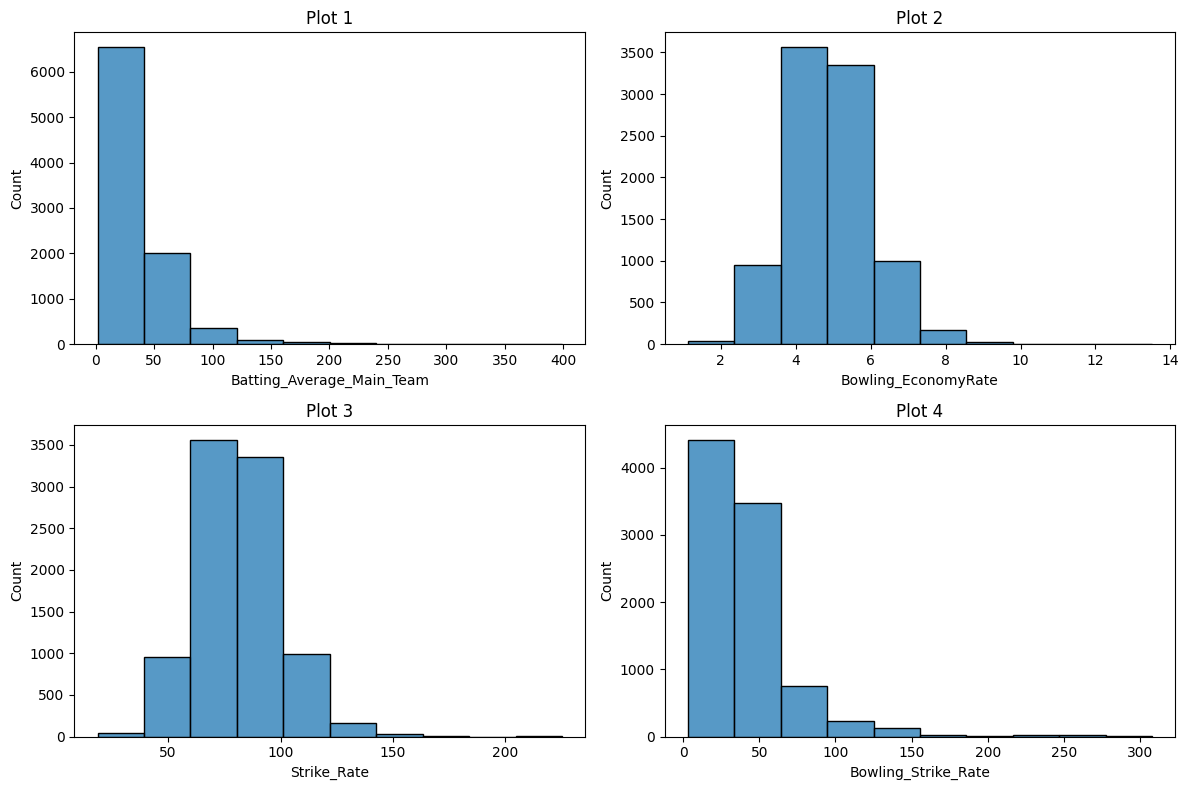

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))


ax[0, 0].set_title("Plot 1")
sns.histplot(data=df2, x='Batting_Average_Main_Team', ax=ax[0, 0],  bins=10)


ax[0, 1].set_title("Plot 2")
sns.histplot(data=df2, x='Bowling_EconomyRate', ax=ax[0, 1],  bins=10)


ax[1, 0].set_title("Plot 3")
sns.histplot(data=df2, x='Strike_Rate', ax=ax[1, 0], bins=10)


ax[1, 1].set_title("Plot 4")
sns.histplot(data=df2, x='Bowling_Strike_Rate', ax=ax[1, 1], bins=10)


plt.tight_layout()


plt.show()

Text(70.72222222222221, 0.5, 'Rows')

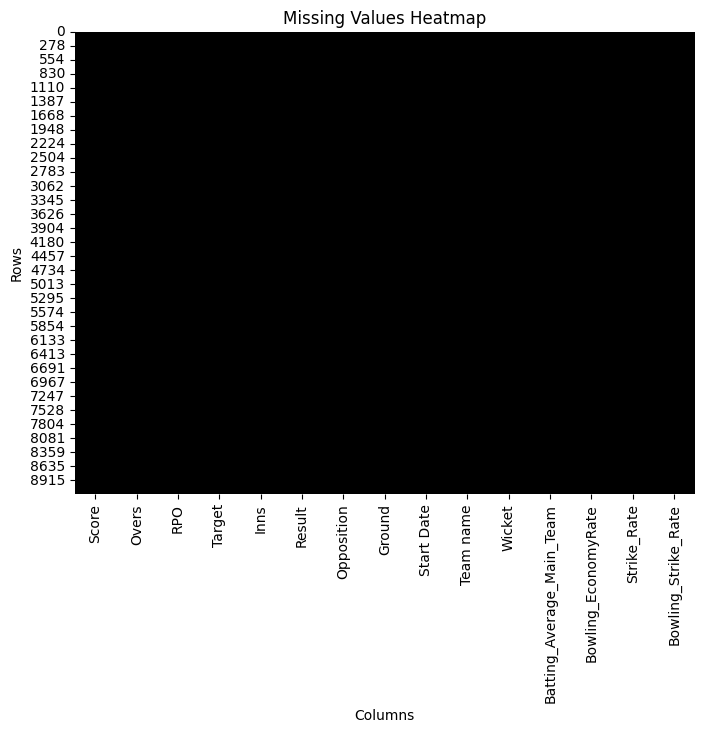

In [ ]:
df_missing_value = df2.isnull()
df_missing_value
plt.figure(figsize=(8, 6))
sns.heatmap(df_missing_value, cbar=False, cmap='gray')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

In [ ]:
df2.isnull().sum().sort_values(ascending=False)

Score                        0
Overs                        0
RPO                          0
Target                       0
Inns                         0
Result                       0
Opposition                   0
Ground                       0
Start Date                   0
Team name                    0
Wicket                       0
Batting_Average_Main_Team    0
Bowling_EconomyRate          0
Strike_Rate                  0
Bowling_Strike_Rate          0
dtype: int64

In [ ]:

top_stats = df.sort_values(by='Score', ascending=False).head(10)

fig = px.sunburst(top_stats, path=['Team name', 'Inns', 'Result', 'Opposition', 'Ground'],
                  hover_data=['Start Date', 'Wicket', 'Batting_Average_Main_Team', 'Bowling_EconomyRate', 'Strike_Rate', 'Bowling_Strike_Rate'],
                  width=800, height=600)

fig.update_layout(title='Top Cricket Statistics', title_font=dict(size=20))

fig.show()

In [ ]:
df2['Ground'].value_counts()

Sharjah          489
Harare           381
Sydney           313
Melbourne        295
Colombo (RPS)    276
                ... 
Nairobi            2
Hove               2
Devonport          2
New Plymouth       2
Sargodha           2
Name: Ground, Length: 188, dtype: int64

In [ ]:

data = {
    'number': [1009, 964, 953, 872, 842, 781, 763, 644, 561, 415, 189, 150, 150, 150, 112, 108, 82, 66, 59, 51, 47, 45, 35, 26, 7, 6, 5, 4, 3],
    'Team Name': ["India", "Australia", "Pakistan", "Srilanka", "West_Indies", "New_Zealand", "England", "South_Africa", "Zimbabwe", "Bangladesh", "Ireland", "Afghanistan", "Scotland", "Kenya", "Netherlands", "UAE", "Canada", "PNG", "Nepal", "USA", "Namibia", "Oman", "Bermuda", "Hong_Kong", "Asia", "Africa XI", "Jersey", "ICC_World_XI", "East_Africa"]
}

df = pd.DataFrame(data)

df = df.sort_values(by='number', ascending=False)


fig = px.funnel(df, x='number', y='Team Name', width=800, height=600)


fig.show()


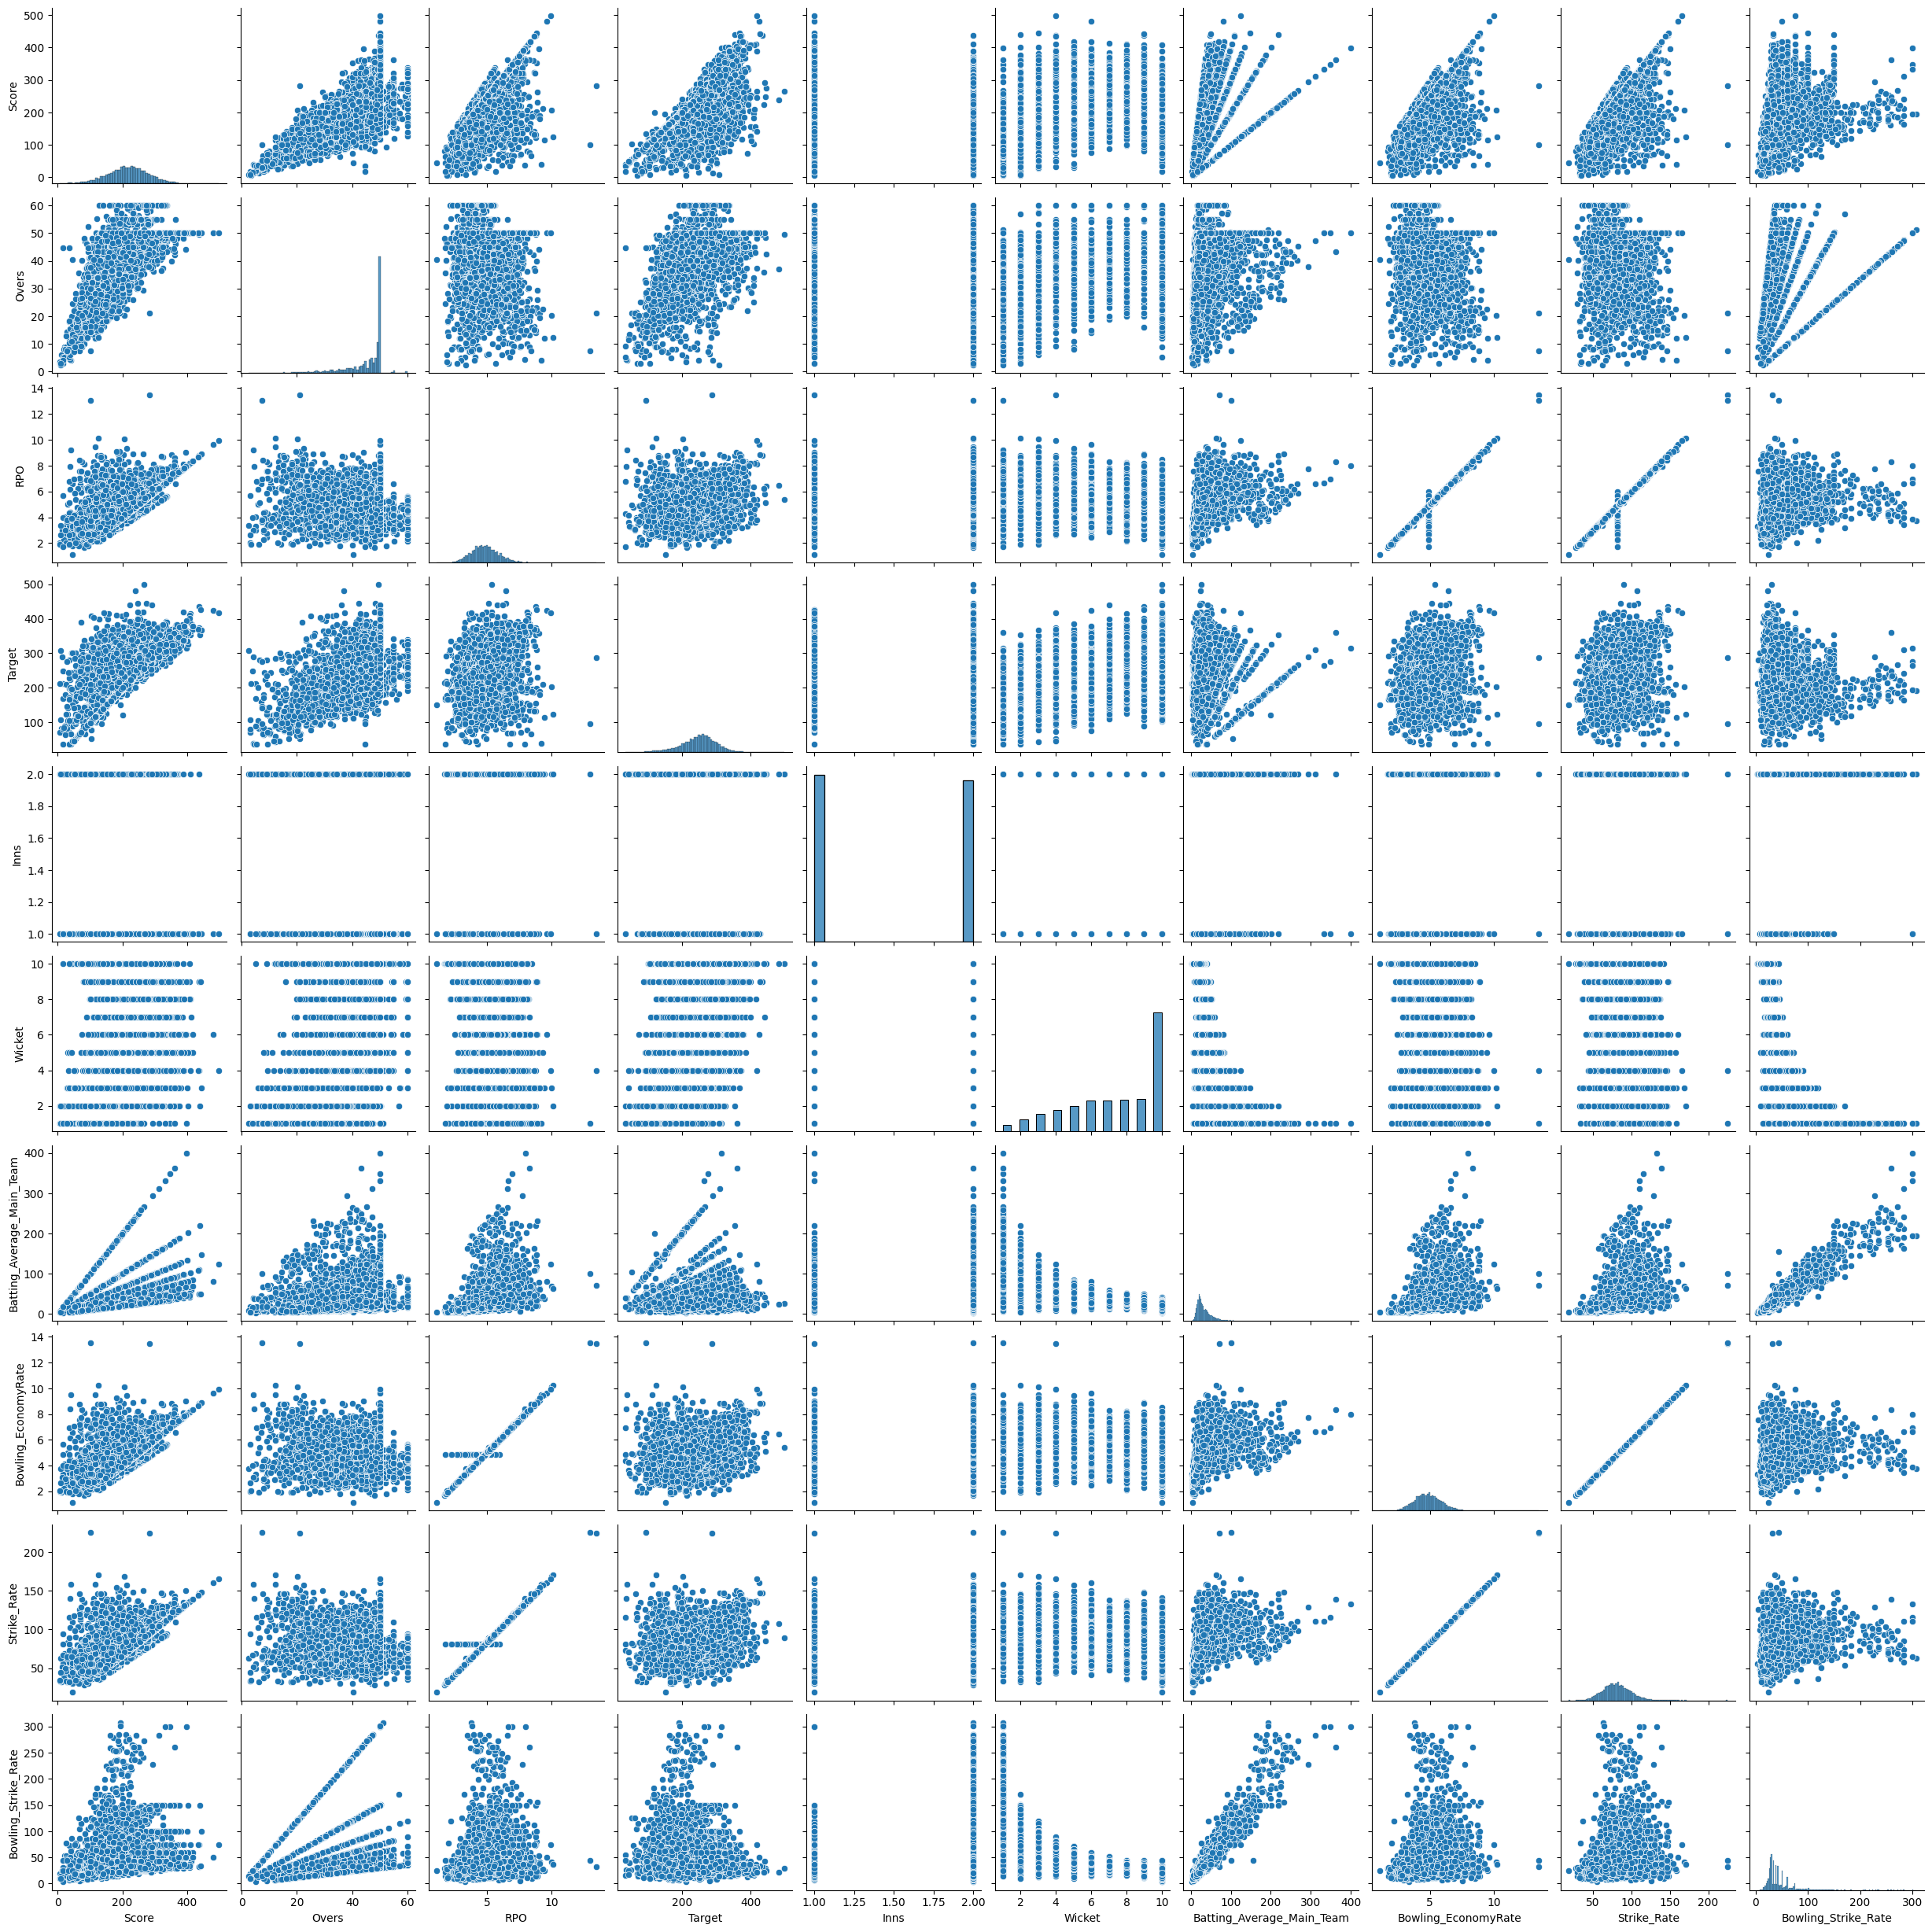

In [ ]:
sns.pairplot(data=df2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9099 entries, 0 to 9183
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Score                      9099 non-null   int64         
 1   Overs                      9099 non-null   float64       
 2   RPO                        9099 non-null   float64       
 3   Target                     9099 non-null   float64       
 4   Inns                       9099 non-null   int64         
 5   Result                     9099 non-null   object        
 6   Opposition                 9099 non-null   object        
 7   Ground                     9099 non-null   object        
 8   Start Date                 9099 non-null   datetime64[ns]
 9   Team name                  9099 non-null   object        
 10  Wicket                     9099 non-null   int64         
 11  Batting_Average_Main_Team  9099 non-null   float64       
 12  Bowlin

In [ ]:
df2.Result.unique()

array(['lost', 'won', 'n/r', 'tied'], dtype=object)

In [ ]:
df2['Team name'].value_counts()

India           1009
Australia        964
Pakistan         953
Srilanka         872
West_Indies      842
New_Zealand      781
England          763
South_Africa     644
Zimbabwe         561
Bangladesh       415
Ireland          189
Afghanistan      150
Scotland         150
Kenya            150
Netherlands      112
UAE              108
Canada            82
PNG               66
Nepal             59
USA               51
Namibia           47
Oman              45
Bermuda           35
Hong_Kong         26
Asia               7
Africa XI          6
Jersey             5
ICC_World_XI       4
East_Africa        3
Name: Team name, dtype: int64

In [ ]:
df2.dtypes

Score                                 int64
Overs                               float64
RPO                                 float64
Target                              float64
Inns                                  int64
Result                               object
Opposition                           object
Ground                               object
Start Date                   datetime64[ns]
Team name                            object
Wicket                                int64
Batting_Average_Main_Team           float64
Bowling_EconomyRate                 float64
Strike_Rate                         float64
Bowling_Strike_Rate                 float64
dtype: object

In [ ]:
df2

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.000000,2,lost,New Zealand,Vadodara,1996-02-17,Netherlands,7,26.857143,3.760000,62.666667,42.857143
1,230,50.0,4.60,280.000000,2,lost,England,Peshawar,1996-02-22,Netherlands,6,38.333333,4.600000,76.666667,50.000000
2,145,50.0,2.90,185.852854,1,lost,Pakistan,Lahore,1996-02-26,Netherlands,7,20.714286,2.900000,48.333333,42.857143
3,216,50.0,4.32,258.454982,1,lost,U.A.E.,Lahore,1996-03-01,Netherlands,9,24.000000,4.320000,72.000000,33.333333
4,168,50.0,3.36,329.000000,2,lost,South Africa,Rawalpindi,1996-03-05,Netherlands,8,21.000000,3.360000,56.000000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,188,35.4,5.27,262.409867,1,lost,India,Wankhede,2023-03-17,Australia,10,18.800000,5.310734,88.512241,21.240000
9180,269,49.0,5.48,308.744014,1,won,India,Chennai,2023-03-22,Australia,10,26.900000,5.489796,91.496599,29.400000
9181,225,40.2,5.57,223.000000,2,won,South Africa,Bloemfontein,2023-09-07,Australia,7,32.142857,5.597015,93.283582,34.457143
9182,392,50.0,7.84,379.002393,1,won,South Africa,Bloemfontein,2023-09-09,Australia,8,49.000000,7.840000,130.666667,37.500000


In [ ]:
new_dataframe = df2.copy()

In [ ]:
for i in df2.columns:
    print(i,'\n',df2[i].value_counts())
    print('-'*90)

Score 
 249    75
211    75
236    74
213    72
208    71
       ..
413     1
9       1
42      1
401     1
378     1
Name: Score, Length: 392, dtype: int64
------------------------------------------------------------------------------------------
Overs 
 50.0    3215
49.0     165
49.5     162
49.2     140
49.4     140
        ... 
6.5        1
7.0        1
6.2        1
8.4        1
11.0       1
Name: Overs, Length: 303, dtype: int64
------------------------------------------------------------------------------------------
RPO 
 4.60    59
5.00    58
4.92    57
4.50    54
4.42    53
        ..
8.56     1
8.05     1
8.12     1
7.77     1
7.78     1
Name: RPO, Length: 620, dtype: int64
------------------------------------------------------------------------------------------
Target 
 250.000000    42
212.000000    41
236.000000    38
272.000000    37
251.000000    36
              ..
219.952046     1
248.672784     1
249.336802     1
234.334861     1
379.002393     1
Name: Target, Length

In [ ]:
df2.corr()

<ipython-input-61-e0c6714eb3b3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Score,Overs,RPO,Target,Inns,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
Score,1.000000,0.664530,0.718053,0.720769,-0.256262,-0.098666,0.343294,0.707881,0.707881,0.183610
Overs,0.664530,1.000000,-0.002601,0.552989,-0.337154,0.258993,-0.028937,-0.012162,-0.012162,-0.007154
RPO,0.718053,-0.002601,1.000000,0.419217,-0.029647,-0.378006,0.498275,0.996724,0.996724,0.261184
Target,0.720769,0.552989,0.419217,1.000000,-0.258171,0.370397,-0.037978,0.409804,0.409804,-0.180556
Inns,-0.256262,-0.337154,-0.029647,-0.258171,1.000000,-0.174994,0.112918,-0.022877,-0.022877,0.147966
Wicket,-0.098666,0.258993,-0.378006,0.370397,-0.174994,1.000000,-0.770881,-0.381699,-0.381699,-0.777144
Batting_Average_Main_Team,0.343294,-0.028937,0.498275,-0.037978,0.112918,-0.770881,1.000000,0.498830,0.498830,0.945203
Bowling_EconomyRate,0.707881,-0.012162,0.996724,0.409804,-0.022877,-0.381699,0.498830,1.000000,1.000000,0.262664
Strike_Rate,0.707881,-0.012162,0.996724,0.409804,-0.022877,-0.381699,0.498830,1.000000,1.000000,0.262664
Bowling_Strike_Rate,0.183610,-0.007154,0.261184,-0.180556,0.147966,-0.777144,0.945203,0.262664,0.262664,1.000000


<ipython-input-62-358905a85071>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

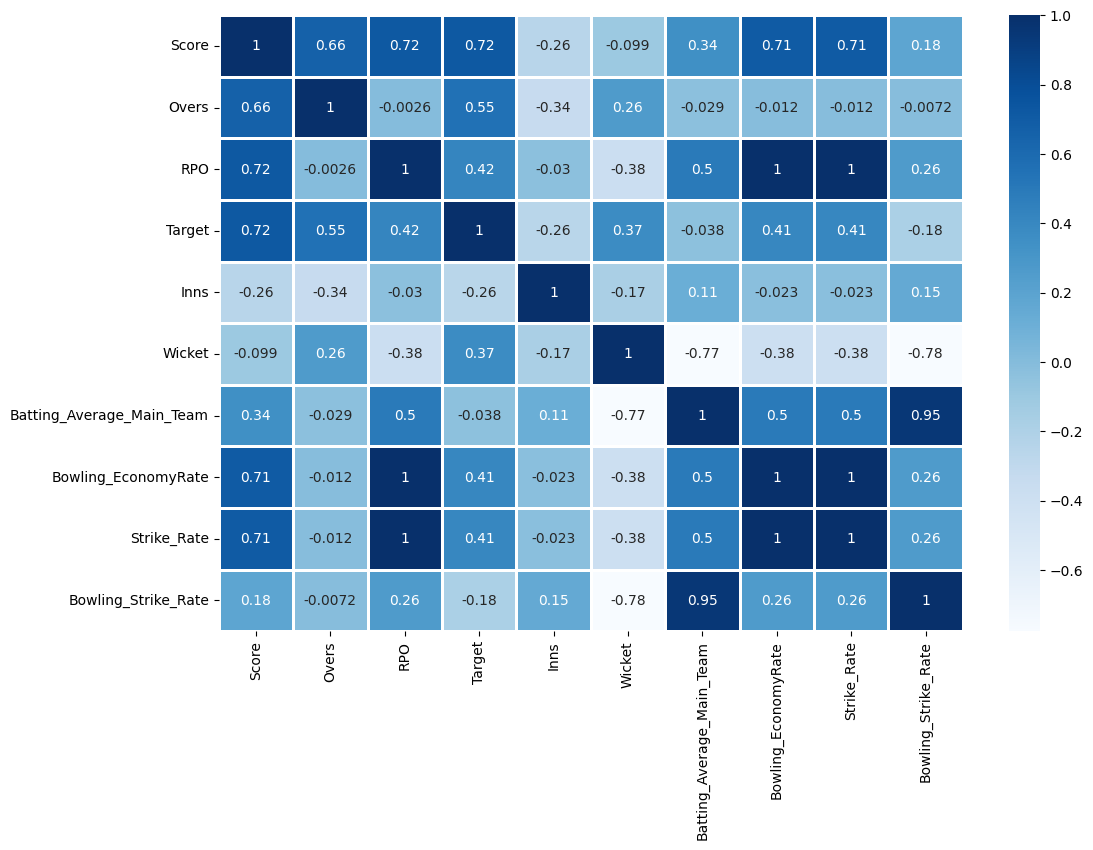

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(),cmap='Blues',linecolor='white',linewidth=2,annot=True)

In [ ]:
Y1 = df2['Result']
X1 = df2.drop('Result', axis=1)

In [ ]:
df2

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.000000,2,lost,New Zealand,Vadodara,1996-02-17,Netherlands,7,26.857143,3.760000,62.666667,42.857143
1,230,50.0,4.60,280.000000,2,lost,England,Peshawar,1996-02-22,Netherlands,6,38.333333,4.600000,76.666667,50.000000
2,145,50.0,2.90,185.852854,1,lost,Pakistan,Lahore,1996-02-26,Netherlands,7,20.714286,2.900000,48.333333,42.857143
3,216,50.0,4.32,258.454982,1,lost,U.A.E.,Lahore,1996-03-01,Netherlands,9,24.000000,4.320000,72.000000,33.333333
4,168,50.0,3.36,329.000000,2,lost,South Africa,Rawalpindi,1996-03-05,Netherlands,8,21.000000,3.360000,56.000000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,188,35.4,5.27,262.409867,1,lost,India,Wankhede,2023-03-17,Australia,10,18.800000,5.310734,88.512241,21.240000
9180,269,49.0,5.48,308.744014,1,won,India,Chennai,2023-03-22,Australia,10,26.900000,5.489796,91.496599,29.400000
9181,225,40.2,5.57,223.000000,2,won,South Africa,Bloemfontein,2023-09-07,Australia,7,32.142857,5.597015,93.283582,34.457143
9182,392,50.0,7.84,379.002393,1,won,South Africa,Bloemfontein,2023-09-09,Australia,8,49.000000,7.840000,130.666667,37.500000


In [ ]:
something = df2.copy()

In [ ]:
something.drop("Ground",axis = 1 ,inplace = True)

In [ ]:
something.drop('Start Date', axis =  1 , inplace = True)

In [ ]:
something.columns

Index(['Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result', 'Opposition',
       'Team name', 'Wicket', 'Batting_Average_Main_Team',
       'Bowling_EconomyRate', 'Strike_Rate', 'Bowling_Strike_Rate'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
cat_columns = something.select_dtypes(include=['object']).columns

for col in cat_columns:
    le = LabelEncoder()
    something[col] = le.fit_transform(something[col])
    label_encoders[col] = le

In [ ]:
something.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Team name,Wicket,Batting_Average_Main_Team,Bowling_EconomyRate,Strike_Rate,Bowling_Strike_Rate
0,188,50.0,3.76,308.000000,2,0,18,17,7,26.857143,3.76,62.666667,42.857143
1,230,50.0,4.60,280.000000,2,0,8,17,6,38.333333,4.60,76.666667,50.000000
2,145,50.0,2.90,185.852854,1,0,21,17,7,20.714286,2.90,48.333333,42.857143
3,216,50.0,4.32,258.454982,1,0,25,17,9,24.000000,4.32,72.000000,33.333333
4,168,50.0,3.36,329.000000,2,0,23,17,8,21.000000,3.36,56.000000,37.500000


In [ ]:
X = something.drop("Result" , axis = 1)
Y = something["Result"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9099 entries, 0 to 9183
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Score                      9099 non-null   int64  
 1   Overs                      9099 non-null   float64
 2   RPO                        9099 non-null   float64
 3   Target                     9099 non-null   float64
 4   Inns                       9099 non-null   int64  
 5   Opposition                 9099 non-null   int64  
 6   Team name                  9099 non-null   int64  
 7   Wicket                     9099 non-null   int64  
 8   Batting_Average_Main_Team  9099 non-null   float64
 9   Bowling_EconomyRate        9099 non-null   float64
 10  Strike_Rate                9099 non-null   float64
 11  Bowling_Strike_Rate        9099 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 924.1 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42 ,max_iter = 10000 ).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#score for train set
logistic_train_pred = clf.predict(X_train)
logistic_a_train_accuracy = metrics.accuracy_score(y_train, logistic_train_pred)

logistic_train_pred = clf.predict(X_train)
logistic_a_train_precisiion = metrics.precision_score(y_train, logistic_train_pred,average='weighted')

logistic_train_pred = clf.predict(X_train)
logistic_a_train_recall = metrics.recall_score(y_train, logistic_train_pred,average='weighted')

logistic_train_pred = clf.predict(X_train)
logistic_a_train_f1 = metrics.f1_score(y_train, logistic_train_pred,average='weighted')

#score for test set
logistic_test_pred = clf.predict(X_test)
logistic_a_test_acuracy = metrics.accuracy_score(y_test, logistic_test_pred)

logistic_test_pred = clf.predict(X_test)
logistic_a_test_precisiion = metrics.precision_score(y_test, logistic_test_pred,average='weighted')


logistic_test_pred = clf.predict(X_test)
logistic_a_test_recall = metrics.recall_score(y_test, logistic_test_pred,average='weighted')


logistic_test_pred = clf.predict(X_test)
logistic_a_test_f1 = metrics.f1_score(y_test, logistic_test_pred,average='weighted')



print('logistic = train accuracy = %.4f'% logistic_a_train_accuracy)
print('logistic = train precission = %.4f'% logistic_a_train_precisiion)
print('logistic = train recall = %.4f'% logistic_a_train_recall)
print('logistic = train f1 = %.4f'% logistic_a_train_f1)

print('logistic = test accuracy = %.4f'% logistic_a_test_acuracy)
print('logistic = test precisiion = %.4f'% logistic_a_test_precisiion)

print('logistic = test recall = %.4f'% logistic_a_test_recall)
print('logistic = test f1 = %.4f'% logistic_a_test_f1)




logistic = train accuracy = 0.8057
logistic = train precission = 0.7979
logistic = train recall = 0.8057
logistic = train f1 = 0.8001
logistic = test accuracy = 0.8033
logistic = test precisiion = 0.8007
logistic = test recall = 0.8033
logistic = test f1 = 0.7989


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
logistic_c_train = confusion_matrix(y_train, logistic_train_pred)

#confusion matrix for tests et
logistic_c_test = confusion_matrix(y_test, logistic_test_pred)

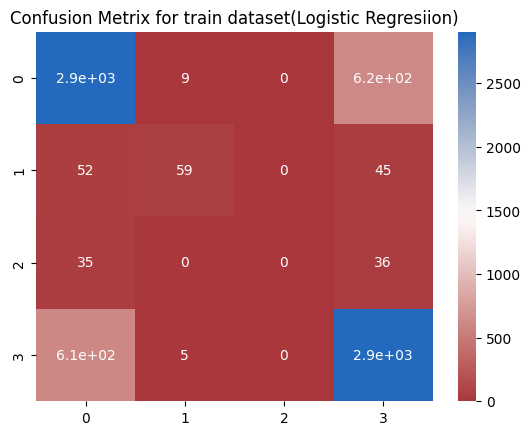

In [ ]:
sns.heatmap(logistic_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(Logistic Regresiion)");

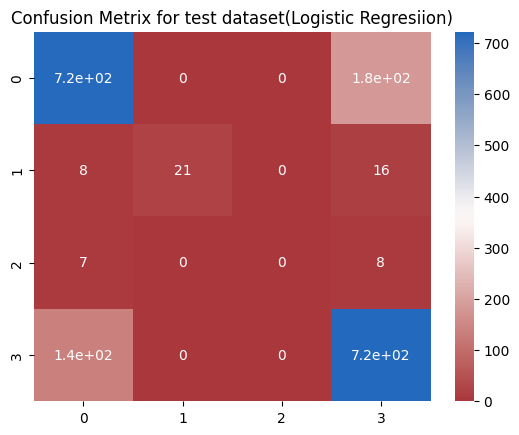

In [ ]:
sns.heatmap(logistic_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Logistic Regresiion)");

In [ ]:
logistic_report_train = classification_report(y_train,logistic_train_pred)
print(logistic_report_train)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3536
           1       0.81      0.38      0.52       156
           2       0.00      0.00      0.00        71
           3       0.80      0.83      0.81      3516

    accuracy                           0.81      7279
   macro avg       0.60      0.51      0.54      7279
weighted avg       0.80      0.81      0.80      7279



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
logistic_report_test = classification_report(y_test,logistic_test_pred)
print(logistic_report_test)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       902
           1       1.00      0.47      0.64        45
           2       0.00      0.00      0.00        15
           3       0.78      0.84      0.81       858

    accuracy                           0.80      1820
   macro avg       0.65      0.53      0.56      1820
weighted avg       0.80      0.80      0.80      1820



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Ani Work

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
random_forest_one= RandomForestClassifier(max_depth=5, random_state=42).fit(X_train, y_train)


y_pred= random_forest_one.predict(X_test)
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7868131868131868
Precision: 0.7839593019181675
Recall: 0.7868131868131868
F1 Score: 0.7795352880123957


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#score for train set
random_train_pred = random_forest_one.predict(X_train)
random_a_train_accuracy = metrics.accuracy_score(y_train, random_train_pred)

random_train_pred = random_forest_one.predict(X_train)
random_a_train_precisiion = metrics.precision_score(y_train, random_train_pred,average='weighted')

random_train_pred = random_forest_one.predict(X_train)
random_a_train_recall = metrics.recall_score(y_train, random_train_pred,average='weighted')

random_train_pred = random_forest_one.predict(X_train)
random_a_train_f1 = metrics.f1_score(y_train, random_train_pred,average='weighted')

#score for test set
random_test_pred = random_forest_one.predict(X_test)
random_a_test_acuracy = metrics.accuracy_score(y_test, random_test_pred)

random_test_pred = random_forest_one.predict(X_test)
random_a_test_precisiion = metrics.precision_score(y_test, random_test_pred,average='weighted')


lrandom_test_pred = random_forest_one.predict(X_test)
random_a_test_recall = metrics.recall_score(y_test, random_test_pred,average='weighted')


random_test_pred = random_forest_one.predict(X_test)
random_a_test_f1 = metrics.f1_score(y_test, random_test_pred,average='weighted')



print('random = train accuracy = %.4f'% random_a_train_accuracy)
print('random = train precission = %.4f'% random_a_train_precisiion)
print('random = train recall = %.4f'% random_a_train_recall)
print('random = train f1 = %.4f'% random_a_train_f1)

print('random = test accuracy = %.4f'% random_a_test_acuracy)
print('random = test precisiion = %.4f'% random_a_test_precisiion)

print('random = test recall = %.4f'% random_a_test_recall)
print('random = test f1 = %.4f'% random_a_test_f1)




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



random = train accuracy = 0.8127
random = train precission = 0.8074
random = train recall = 0.8127
random = train f1 = 0.8057
random = test accuracy = 0.7868
random = test precisiion = 0.7840
random = test recall = 0.7868
random = test f1 = 0.7795


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
random_c_train = confusion_matrix(y_train, random_train_pred)

#confusion matrix for tests et
random_c_test = confusion_matrix(y_test, random_test_pred)

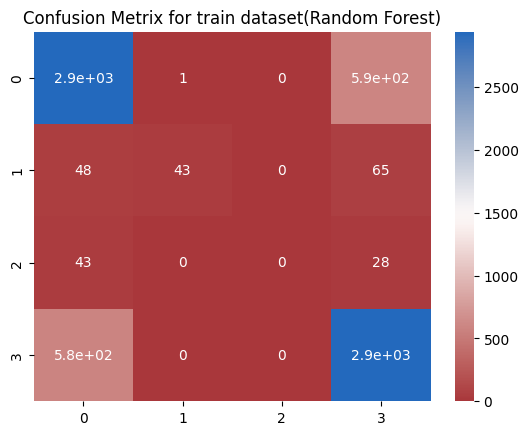

In [ ]:
sns.heatmap(random_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(Random Forest)");

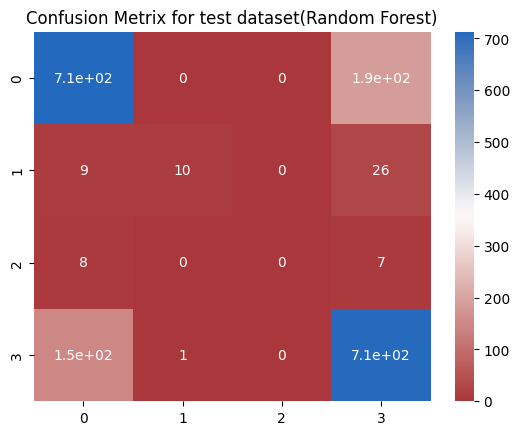

In [ ]:
sns.heatmap(random_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Random Forest)");

In [ ]:
random_report_train = classification_report(y_train,random_train_pred)
print(random_report_train)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3536
           1       0.98      0.28      0.43       156
           2       0.00      0.00      0.00        71
           3       0.81      0.83      0.82      3516

    accuracy                           0.81      7279
   macro avg       0.65      0.49      0.52      7279
weighted avg       0.81      0.81      0.81      7279



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
random_report_test = classification_report(y_test,random_test_pred)
print(random_report_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       902
           1       0.91      0.22      0.36        45
           2       0.00      0.00      0.00        15
           3       0.76      0.83      0.79       858

    accuracy                           0.79      1820
   macro avg       0.62      0.46      0.49      1820
weighted avg       0.78      0.79      0.78      1820



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB().fit(X, Y)



y_pred= naive_bayes.predict(X_test)
y_true = y_test


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


naive_bayes_train_pred = naive_bayes.predict(X_train)
naive_bayes_a_train_accuracy = metrics.accuracy_score(y_train, naive_bayes_train_pred)

naive_bayes_train_pred = naive_bayes.predict(X_train)
naive_bayes_a_train_precisiion = metrics.precision_score(y_train,naive_bayes_train_pred,average='weighted')

naive_bayes_train_pred = naive_bayes.predict(X_train)
naive_bayes_a_train_recall = metrics.recall_score(y_train, naive_bayes_train_pred,average='weighted')

naive_bayes_train_pred = naive_bayes.predict(X_train)
naive_bayes_a_train_f1 = metrics.f1_score(y_train, naive_bayes_train_pred,average='weighted')


naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_acuracy = metrics.accuracy_score(y_test, naive_bayes_test_pred)

naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_precisiion = metrics.precision_score(y_test, naive_bayes_test_pred,average='weighted')


naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_recall = metrics.recall_score(y_test, naive_bayes_test_pred,average='weighted')


naive_bayes_test_pred = naive_bayes.predict(X_test)
naive_bayes_a_test_f1 = metrics.f1_score(y_test, naive_bayes_test_pred,average='weighted')



print('naive_bayes = train accuracy = %.4f'% naive_bayes_a_train_accuracy)
print('naive_bayes = train precission = %.4f'% naive_bayes_a_train_precisiion)
print('naive_bayes = train recall = %.4f'% naive_bayes_a_train_recall)
print('naive_bayes = train f1 = %.4f'% naive_bayes_a_train_f1)

print('naive_bayes = test accuracy = %.4f'% naive_bayes_a_test_acuracy)
print('naive_bayes= test precisiion = %.4f'% naive_bayes_a_test_precisiion)

print('naive_bayes = test recall = %.4f'% naive_bayes_a_test_recall)
print('naive_bayes = test f1 = %.4f'% naive_bayes_a_test_f1)




naive_bayes = train accuracy = 0.7207
naive_bayes = train precission = 0.7400
naive_bayes = train recall = 0.7207
naive_bayes = train f1 = 0.7180
naive_bayes = test accuracy = 0.7297
naive_bayes= test precisiion = 0.7410
naive_bayes = test recall = 0.7297
naive_bayes = test f1 = 0.7258


In [ ]:
naive_c_train = confusion_matrix(y_train, naive_bayes_train_pred)

#confusion matrix for tests et
naive_c_test = confusion_matrix(y_test, naive_bayes_test_pred)

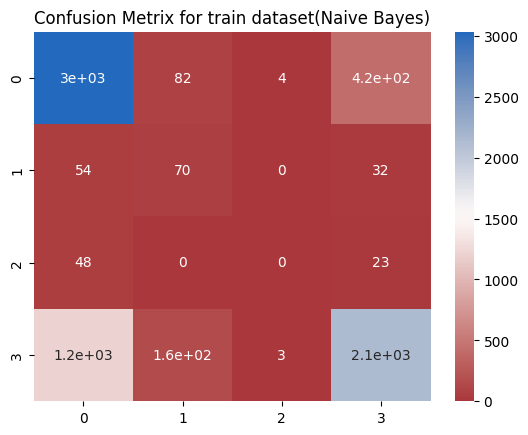

In [ ]:
sns.heatmap(naive_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(Naive Bayes)");

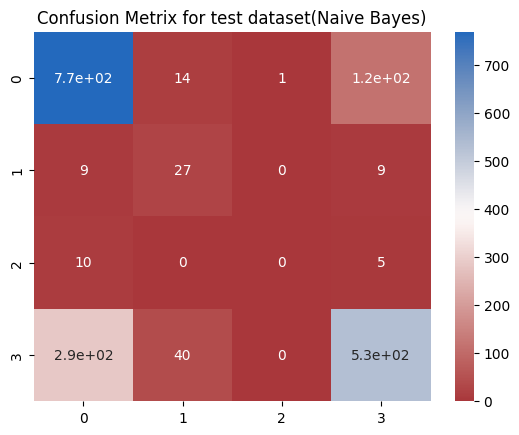

In [ ]:
sns.heatmap(naive_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Naive Bayes)");

In [ ]:
naive_report_train = classification_report(y_train,naive_bayes_train_pred)
print(naive_report_train)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      3536
           1       0.22      0.45      0.30       156
           2       0.00      0.00      0.00        71
           3       0.82      0.61      0.70      3516

    accuracy                           0.72      7279
   macro avg       0.44      0.48      0.44      7279
weighted avg       0.74      0.72      0.72      7279



In [ ]:
naive_report_test = classification_report(y_test,naive_bayes_test_pred)
print(naive_report_test)

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       902
           1       0.33      0.60      0.43        45
           2       0.00      0.00      0.00        15
           3       0.80      0.62      0.70       858

    accuracy                           0.73      1820
   macro avg       0.46      0.52      0.48      1820
weighted avg       0.74      0.73      0.73      1820



In [ ]:
from sklearn import svm

Svc = svm.SVC().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


Svc_train_pred = Svc.predict(X_train)
Svc_a_train_accuracy = metrics.accuracy_score(y_train, Svc_train_pred)

Svc_train_pred = Svc.predict(X_train)
Svc_a_train_precisiion = metrics.precision_score(y_train, Svc_train_pred,average='weighted')

Svc_train_pred = Svc.predict(X_train)
Svc_a_train_recall = metrics.recall_score(y_train, Svc_train_pred,average='weighted')

Svc_train_pred = Svc.predict(X_train)
Svc_a_train_f1 = metrics.f1_score(y_train, Svc_train_pred,average='weighted')


Svc_test_pred = Svc.predict(X_test)
Svc_a_test_acuracy = metrics.accuracy_score(y_test, Svc_test_pred)

Svc_test_pred = Svc.predict(X_test)
Svc_a_test_precisiion = metrics.precision_score(y_test, Svc_test_pred,average='weighted')


Svc_test_pred = Svc.predict(X_test)
Svc_a_test_recall = metrics.recall_score(y_test, Svc_test_pred,average='weighted')


Svc_test_pred = Svc.predict(X_test)
Svc_a_test_f1 = metrics.f1_score(y_test, Svc_test_pred,average='weighted')



print('Svc = train accuracy = %.4f'% Svc_a_train_accuracy)
print('Svc = train precission = %.4f'% Svc_a_train_precisiion)
print('Svc = train recall = %.4f'% Svc_a_train_recall)
print('Svc = train f1 = %.4f'% Svc_a_train_f1)

print('Svc = test accuracy = %.4f'% Svc_a_test_acuracy)
print('Svc = test precisiion = %.4f'% Svc_a_test_precisiion)

print('Svc = test recall = %.4f'% Svc_a_test_recall)
print('Svc = test f1 = %.4f'% Svc_a_test_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Svc = train accuracy = 0.7798
Svc = train precission = 0.7757
Svc = train recall = 0.7798
Svc = train f1 = 0.7725
Svc = test accuracy = 0.7780
Svc = test precisiion = 0.7786
Svc = test recall = 0.7780
Svc = test f1 = 0.7697


In [ ]:
svc_c_train = confusion_matrix(y_train, Svc_train_pred)

#confusion matrix for tests et
svc_c_test = confusion_matrix(y_test, Svc_test_pred)

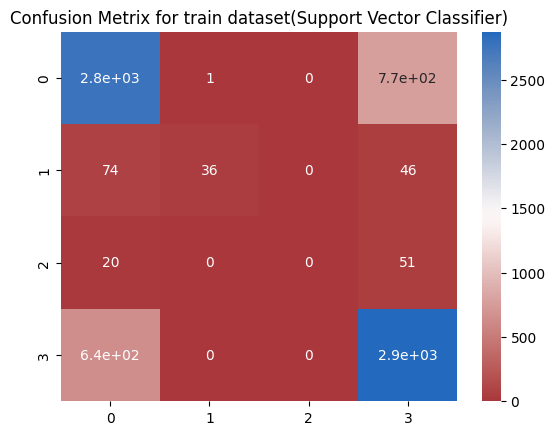

In [ ]:
sns.heatmap(svc_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(Support Vector Classifier)");

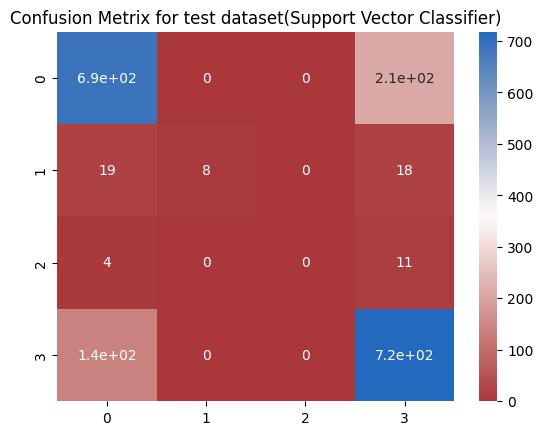

In [ ]:
sns.heatmap(svc_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Support Vector Classifier)");

In [ ]:
svc_report_train = classification_report(y_train,Svc_train_pred)
print(svc_report_train)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3536
           1       0.97      0.23      0.37       156
           2       0.00      0.00      0.00        71
           3       0.77      0.82      0.79      3516

    accuracy                           0.78      7279
   macro avg       0.63      0.46      0.49      7279
weighted avg       0.78      0.78      0.77      7279



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
svc_report_test = classification_report(y_test,Svc_test_pred)
print(svc_report_test)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       902
           1       1.00      0.18      0.30        45
           2       0.00      0.00      0.00        15
           3       0.75      0.84      0.79       858

    accuracy                           0.78      1820
   macro avg       0.64      0.44      0.47      1820
weighted avg       0.78      0.78      0.77      1820



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split


logistic_reg = LogisticRegression(random_state=42, max_iter=10000)
logistic_grid = {
    'C': np.logspace(-4, 2, 20),
}
logistic_clf = GridSearchCV(logistic_reg, param_grid=logistic_grid, cv=3)
logistic_clf.fit(X_train, y_train)

print("Logistic Regression:")
print("Best Estimator:", logistic_clf.best_estimator_)
print('Train Score:', logistic_clf.score(X_train, y_train))
print('Test Score:', logistic_clf.score(X_test, y_test))


random_forest = RandomForestClassifier(max_depth=5, random_state=42)
random_forest_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
}
random_forest_clf = GridSearchCV(random_forest, param_grid=random_forest_grid, cv=3)
random_forest_clf.fit(X_train, y_train)

print("\nRandom Forest:")
print("Best Estimator:", random_forest_clf.best_estimator_)
print('Train Score:', random_forest_clf.score(X_train, y_train))
print('Test Score:', random_forest_clf.score(X_test, y_test))


naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

print("\nNaive Bayes:")
print('Train Score:', naive_bayes.score(X_train, y_train))
print('Test Score:', naive_bayes.score(X_test, y_test))


svm_model = svm.SVC()
svm_grid = {
    'C': [0.1, 1.0],
    'kernel': ['linear', 'rbf'],
}
svm_clf = GridSearchCV(svm_model, param_grid=svm_grid, cv=3, n_jobs=-1)
svm_clf.fit(X_train, y_train)

print("\nSVM:")
print("Best Estimator:", svm_clf.best_estimator_)
print('Train Score:', svm_clf.score(X_train, y_train))
print('Test Score:', svm_clf.score(X_test, y_test))


In [ ]:
svm_train_pred = svm_clf.predict(X_train)
svm_a_train = metrics.accuracy_score(y_train, svm_train_pred)
svm_c_train = confusion_matrix(y_train, svm_train_pred)

sns.heatmap(svm_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(SVM)");

In [ ]:

svm_test_pred = svm_clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)
svm_c_test = confusion_matrix(y_test, svm_test_pred)

sns.heatmap(svm_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(SVM)");

In [ ]:
svm_report = classification_report(y_test,svm_test_pred)
print(svm_report)

In [ ]:
svc_report_train = classification_report(y_train,svm_train_pred)
print(svc_report_train)

In [ ]:
logistic_train_pred = logistic_clf.predict(X_train)
logistic_a_train = metrics.accuracy_score(y_train, logistic_train_pred)
logistic_c_train = confusion_matrix(y_train, logistic_train_pred)

sns.heatmap(logistic_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(Logistic Regression)");

In [ ]:

logistic_test_pred = logistic_clf.predict(X_test)
logistic_a_test = metrics.accuracy_score(y_test, logistic_test_pred)
logistic_c_test = confusion_matrix(y_test, logistic_test_pred)

sns.heatmap(logistic_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(Logistic Regression)");

In [ ]:
logistic_report = classification_report(y_test,logistic_test_pred)
print(logistic_report)

In [ ]:
logistic_report  = classification_report(y_train,logistic_train_pred)
print(logistic_report)

In [ ]:
randomforest_train_pred = random_forest_clf.predict(X_train)
randomforest_a_train = metrics.accuracy_score(y_train, randomforest_train_pred)
randomforest_c_train = confusion_matrix(y_train, randomforest_train_pred)

sns.heatmap(randomforest_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(Random Forest)");

In [ ]:
#confusion  matrix for test set

RandomForest_test_pred = random_forest_clf.predict(X_test)
RandomForest_a_test = metrics.accuracy_score(y_test, RandomForest_test_pred)
RandomForest_c_test = confusion_matrix(y_test, RandomForest_test_pred)

sns.heatmap(RandomForest_c_test, annot=True, cmap="vlag_r")
plt.title("Random Forest for test dataset(Random Forest)");

In [ ]:
RandomForest_report = classification_report(y_test,RandomForest_test_pred)
print(RandomForest_report)

In [ ]:
RandomForest_report  = classification_report(y_train,randomforest_train_pred)
print(RandomForest_report)

In [ ]:
naivebayes_train_pred = naive_bayes.fit(X_train, y_train).predict(X_train)
naivebayesc_a_train = metrics.accuracy_score(y_train, naivebayes_train_pred)
naivebayes_c_train = confusion_matrix(y_train, naivebayes_train_pred)

sns.heatmap(naivebayes_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(Naive Bayes)");

In [ ]:
naive_bayes.fit(X_train, y_train)
naivebayes_test_pred = naive_bayes.predict(X_test)
naivebayes_a_test = metrics.accuracy_score(y_test, naivebayes_test_pred)
naivebayes_c_test = confusion_matrix(y_test, naivebayes_test_pred)
sns.heatmap(naivebayes_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Matrix for Test Dataset (Naive Bayes)")
plt.show()


In [ ]:
naivebayes_report = classification_report(y_test, naivebayes_test_pred)
print(naivebayes_report)

In [ ]:
naivebayes_report  = classification_report(y_train,naivebayes_train_pred)
print(RandomForest_report)

In [ ]:
print("Hello")

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


logistic_regression = LogisticRegression(random_state=42, max_iter=10000)
random_forest = RandomForestClassifier(max_depth=5, random_state=42)
naive_bayes = GaussianNB()


ensemble_model_classification = VotingClassifier(
    estimators=[('lr', clf ), ('rf', random_forest_one), ('nb', naive_bayes),('svm',Svc)],
    voting='hard'
)


ensemble_model_classification.fit(X_train, y_train)


y_pred= ensemble_predictions = ensemble_model_classification.predict(X_test)
y_true = y_test


In [ ]:
user_input_data = {}


for col in something.columns:
    if col != 'Result':
        if col in label_encoders:

            encoder = label_encoders[col]
            user_input = input(f"Enter a value for '{col}': ")
            try:
                encoded_value = encoder.transform([user_input])[0]
                user_input_data[col] = [encoded_value]
            except ValueError:
                print(f"Invalid input for '{col}'. Please enter a valid category.")
        else:

            user_input = input(f"Enter a value for '{col}': ")
            try:
                user_input_data[col] = [float(user_input)]
            except ValueError:
                print(f"Invalid input for '{col}'. Please enter a numeric value.")


user_input_df = pd.DataFrame(user_input_data)


predictions = ensemble_model_classification.predict(user_input_df)

print(predictions)




In [ ]:
accuracy_score(y_true, y_pred )

In [ ]:
something1 = df2.copy()

In [ ]:
something1.drop("Ground",axis = 1 ,inplace = True)

In [ ]:
something1.drop("Result",axis = 1 ,inplace = True)

In [ ]:
something1.drop("Start Date",axis = 1 ,inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
cat_columns = something1.select_dtypes(include=['object']).columns

for col1 in cat_columns:
    le = LabelEncoder()
    something1[col1] = le.fit_transform(something1[col1])
    label_encoders[col1] = le

In [ ]:
something1.dtypes

In [ ]:
X = something1.drop("Score" , axis = 1)
Y = something1["Score"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

In [ ]:

y_predict = lr_model.predict(X_test)
y_predict

In [ ]:

train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

In [ ]:
test_accuracy = lr_model.score(X_test, y_test)
test_accuracy

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_train_predict = lr_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_predict)
train_mse = mean_squared_error(y_train, y_train_predict)
train_r2 = r2_score(y_train, y_train_predict)


y_test_predict = lr_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
test_r2 = r2_score(y_test, y_test_predict)

print("Training Data:")
print('Mean absolute error =', train_mae)
print('Mean square error =', train_mse)
print('R2 Score =', train_r2)

print("\nTesting Data:")
print('Mean absolute error =', test_mae)
print('Mean square error =', test_mse)
print('R2 Score =', test_r2)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)


y_train_predict = ridge_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_predict)
train_mse = mean_squared_error(y_train, y_train_predict)
train_r2 = r2_score(y_train, y_train_predict)

y_test_predict = ridge_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
test_r2 = r2_score(y_test, y_test_predict)

print("Training Data:")
print('Mean absolute error =', train_mae)
print('Mean square error =', train_mse)
print('R2 Score =', train_r2)

print("\nTesting Data:")
print('Mean absolute error =', test_mae)
print('Mean square error =', test_mse)
print('R2 Score =', test_r2)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =2)
x_train_poly= poly.fit_transform(X_train)
x_test_poly= poly.fit_transform(X_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

In [ ]:
predict_train_poly = model.predict(x_train_poly)
predict_train_poly

In [ ]:
predict_test_poly = model.predict(x_test_poly)
predict_test_poly

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
train_accuracy = model.score(x_train_poly, y_train)
train_accuracy

In [ ]:
test_accuracy = model.score(x_test_poly, y_test)
test_accuracy

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np


degree = 2
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

model = LinearRegression()

cv_scores = cross_val_score(model, x_train_poly, y_train, cv=5)


print('Cross-Validation Scores (Training Data):', cv_scores)
print('Mean Cross-Validation Score (Training Data):', cv_scores.mean())


model.fit(x_train_poly, y_train)


train_accuracy = model.score(x_train_poly, y_train)
print('Training Accuracy:', train_accuracy)


test_accuracy = model.score(x_test_poly, y_test)
print('Test Accuracy:', test_accuracy)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print('Training Data Metrics:')
print('Mean Absolute Error = ', mean_absolute_error(y_train, predict_train_poly))
print('Mean Square Error = ', mean_squared_error(y_train, predict_train_poly))
print('R2 Score = ', r2_score(y_train, predict_train_poly))

print('\nTesting Data Metrics:')
print('Mean Absolute Error = ', mean_absolute_error(y_test, predict_test_poly))
print('Mean Square Error = ', mean_squared_error(y_test, predict_test_poly))
print('R2 Score = ', r2_score(y_test, predict_test_poly))


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


alpha = 1.0
model = Ridge(alpha=alpha)


model.fit(X_train_poly, y_train)


y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mean_abs=mean_absolute_error(y_train, y_train_pred)
test_mean_abs=mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("Training Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Training Mean Absolute Error:", train_mean_abs)
print("Test Mean Absolute Error:", test_mean_abs)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)




In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


lasso_model = Lasso()
poly_features = PolynomialFeatures()
pipeline = make_pipeline(poly_features, lasso_model)


pipeline.fit(X_train, y_train)


y_predict = pipeline.predict(X_test)


In [ ]:
train_accuracy = pipeline.score(X_train, y_train)
print('Training Accuracy =', train_accuracy)


In [ ]:
test_accuracy = pipeline.score(X_test, y_test)
print('Test Accuracy =', test_accuracy)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_predict = pipeline.predict(X_train)
y_test_predict = pipeline.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)


mae_test = mean_absolute_error(y_test, y_test_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)


print('Training Data Metrics:')
print('Mean Absolute Error =', mae_train)
print('Mean Square Error =', mse_train)
print('R2 Score =', r2_train)

print('\nTesting Data Metrics:')
print('Mean Absolute Error =', mae_test)
print('Mean Square Error =', mse_test)
print('R2 Score =', r2_test)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


ridge_model = Ridge(alpha=1.0)
poly_features = PolynomialFeatures()
pipeline = make_pipeline(poly_features, ridge_model)


pipeline.fit(X_train, y_train)


y_train_predict = pipeline.predict(X_train)
y_test_predict = pipeline.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)


mae_test = mean_absolute_error(y_test, y_test_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)


print('Training Data Metrics:')
print('Mean Absolute Error =', mae_train)
print('Mean Square Error =', mse_train)
print('R2 Score =', r2_train)

print('\nTesting Data Metrics:')
print('Mean Absolute Error =', mae_test)
print('Mean Square Error =', mse_test)
print('R2 Score =', r2_test)


In [ ]:
from sklearn.ensemble import VotingRegressor


models = [
    ('ridge_model_1', ridge_model),
    ('ridge_model_2', model),
    ('ridge_model_3', pipeline)
]


ensemble_model = VotingRegressor(estimators=models)

ensemble_model.fit(X_train, y_train)


ensemble_train_predictions = ensemble_model.predict(X_train)
ensemble_test_predictions = ensemble_model.predict(X_test)

ensemble_train_mae = mean_absolute_error(y_train, ensemble_train_predictions)
ensemble_train_mse = mean_squared_error(y_train, ensemble_train_predictions)
ensemble_train_r2 = r2_score(y_train, ensemble_train_predictions)

ensemble_test_mae = mean_absolute_error(y_test, ensemble_test_predictions)
ensemble_test_mse = mean_squared_error(y_test, ensemble_test_predictions)
ensemble_test_r2 = r2_score(y_test, ensemble_test_predictions)

print('Ensemble Training Data Metrics:')
print('Mean Absolute Error =', ensemble_train_mae)
print('Mean Square Error =', ensemble_train_mse)
print('R2 Score =', ensemble_train_r2)

print('\nEnsemble Testing Data Metrics:')
print('Mean Absolute Error =', ensemble_test_mae)
print('Mean Square Error =', ensemble_test_mse)
print('R2 Score =', ensemble_test_r2)


In [ ]:
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()
print('Cross-Validation Mean Squared Error =', cv_mse_mean)

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


ridge_model_1 = Ridge()
ridge_model_2 = Ridge()
ridge_model_3 = Ridge()

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


models = [
    ('ridge_model_1', ridge_model_1),
    ('ridge_model_2', ridge_model_2),
    ('ridge_model_3', ridge_model_3),
    ('rf_model', rf_model),
    ('gb_model', gb_model)
]

best_ensemble_model_regression = VotingRegressor(
    estimators=models,
    weights=[0.15, 0.15, 0.15, 0.25, 0.3]
)

param_grid = {
    'ridge_model_1__alpha': [0.01, 0.1, 1.0],
    'ridge_model_2__alpha': [0.01, 0.1, 1.0],
    'ridge_model_3__alpha': [0.01, 0.1, 1.0],
}


grid_search = GridSearchCV(best_ensemble_model_regression, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)


best_ensemble_model_regression = grid_search.best_estimator_


ensemble_train_predictions = best_ensemble_model_regression.predict(X_train_selected)
ensemble_test_predictions = best_ensemble_model_regression.predict(X_test_selected)


ensemble_train_mse = mean_squared_error(y_train, ensemble_train_predictions)
ensemble_test_mse = mean_squared_error(y_test, ensemble_test_predictions)

print('Ensemble Training Data Mean Square Error =', ensemble_train_mse)
print('Ensemble Testing Data Mean Square Error =', ensemble_test_mse)


In [ ]:

user_input_data = {}

for col1 in something.columns:
  if col1 not in ['Result',"Score"]:

    if col1 in label_encoders:

        encoder = label_encoders[col1]
        user_input = input(f"Enter a value for '{col1}': ")
        encoded_value = encoder.transform([user_input])[0]
        user_input_data[col1] = [encoded_value]
    else:

        user_input = input(f"Enter a value for '{col1}': ")
        user_input_data[col1] = [float(user_input)]


user_input = pd.DataFrame(user_input_data)

print(ensemble_model.predict(user_input))